## Subclustering of oligodendroglia

In [1]:
library(Seurat)
library(ggplot2)
library(dplyr)
library(RColorBrewer)
library(gridExtra)
library(ggh4x)

Attaching SeuratObject

Attaching sp


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
ogd_pool <- readRDS(file = "/local/Nina/jupyterlab/brains_trans/ogd_pool_in.rds")

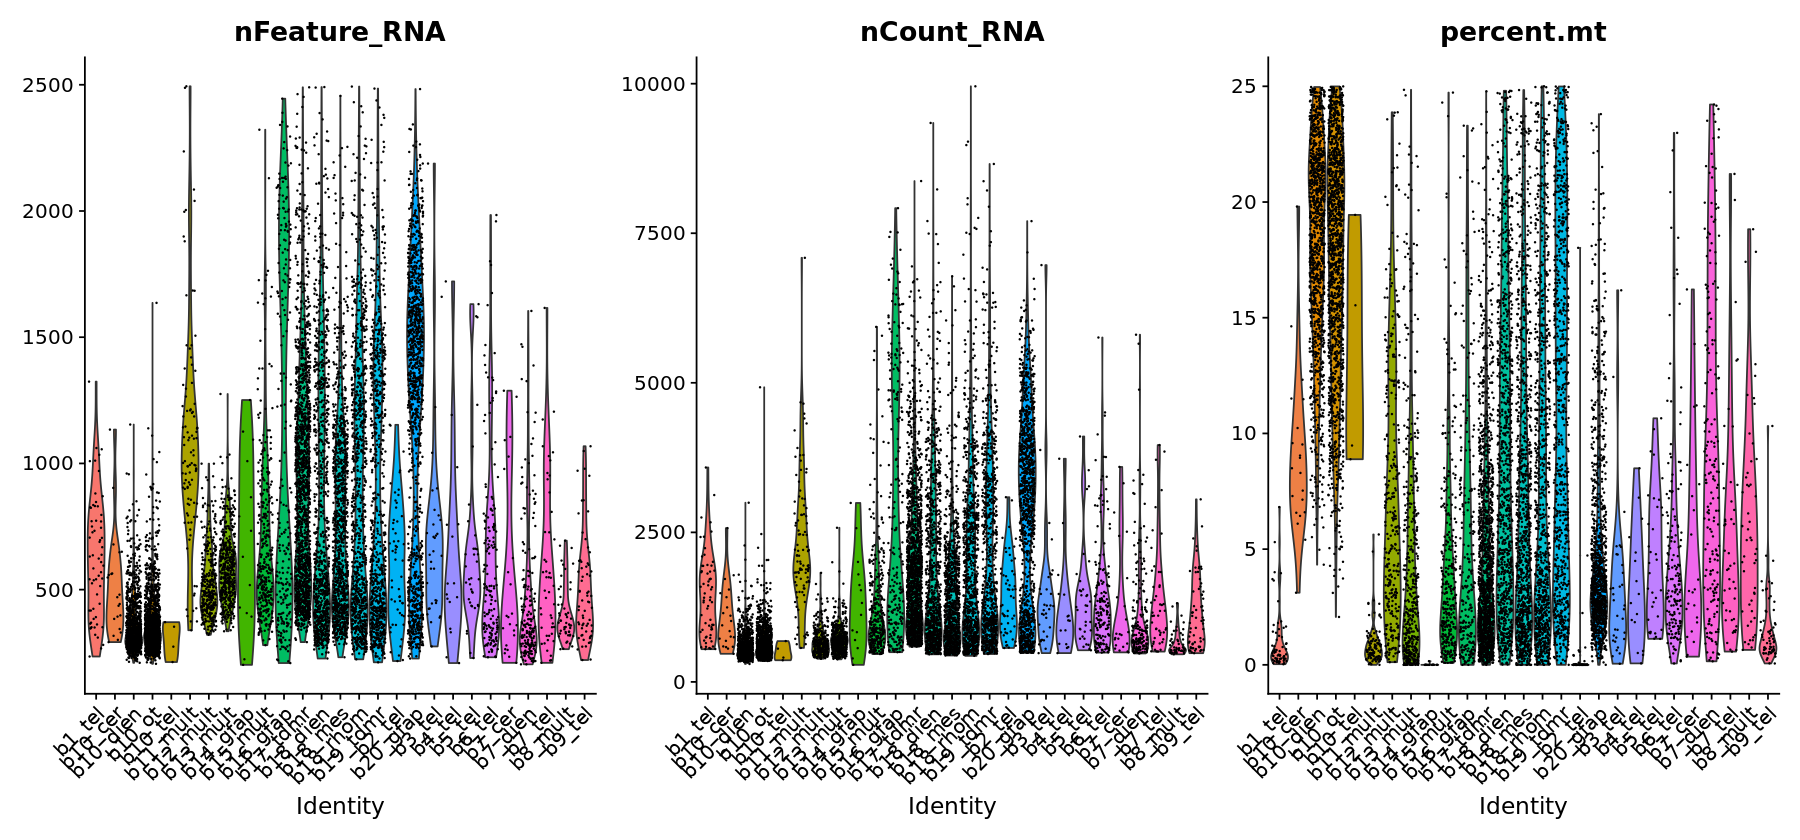

In [3]:
options(repr.plot.width=15, repr.plot.height=7)

qc_plot_rg <- VlnPlot(object = ogd_pool, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3, pt.size = 0.05, group.by = "orig.ident")
qc_plot_rg

### Clustering with regression of technical covariates

In [4]:
ogd_pool <- NormalizeData(object = ogd_pool, normalization.method = "LogNormalize", scale.factor = 1e4)

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 2621 rows containing missing values (geom_point).”
Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


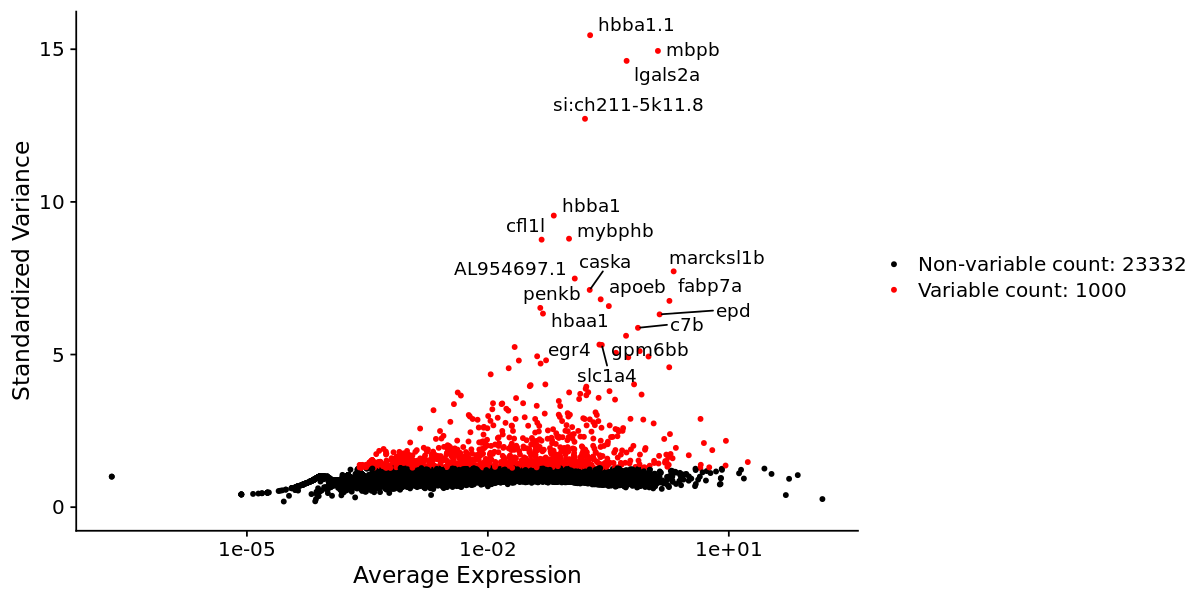

In [5]:
options(repr.plot.width=10, repr.plot.height=5)

ogd_pool <- FindVariableFeatures(object = ogd_pool, selection.method = 'vst', nfeatures = 1000)

#plot variable features with top vargenes labeled
top20 <- head(x = VariableFeatures(object = ogd_pool), 20)
plot_var_feat <- LabelPoints(plot = VariableFeaturePlot(object = ogd_pool), points = top20, repel = TRUE)
plot_var_feat

In [ ]:
all.genes <- rownames(x = ogd_pool)
ogd_pool <- ScaleData(object = ogd_pool, features = all.genes, vars.to.regress = c("nFeature_RNA","nCount_RNA","percent.mt"))

Regressing out nFeature_RNA, nCount_RNA, percent.mt



PC_ 1 
Positive:  si:dkey-200l5.4, si:rp71-19m20.1, cdaa, crp1, si:dkeyp-73d8.8, mag, glipr2l, clic2, si:ch211-195b13.1, tuft1a 
	   glula, tcima, ptmaa, map4l, CR936442.1, sept5a, ggctb, vim, zgc:158463, htra1a 
	   cahz, nes, slc7a10a, sult2st1, si:dkeyp-72h1.1, tuba8l3, ip6k2a, si:dkeyp-73d8.9, crip3, zgc:92249 
Negative:  gpm6bb, fabp7a, marcksl1b, traf4a, bcan, sema5a, igsf9ba, si:dkey-56m19.5, draxin, gpm6aa 
	   tnr, sox6, si:busm1-57f23.1, aplnra, syt9b, dscamb, vegfab, proca1, gria2b, mtss1lb 
	   aplnrb, scg3, lgals2a, fosab, cadm3, CR786577.1, slc1a2b, mcl1a, cd99l2, zgc:66433 
PC_ 2 
Positive:  sema5a, aplnra, aplnrb, gria2b, igsf9ba, scg3, si:ch211-113g11.6, cspg5a, spock3, sparcl1 
	   gria4a, slc1a1, cxcl12a, nptx1l, kiaa1549la, grin1a, olig1, spock2, ptprn2, scg2b 
	   cadm3, cd9a, syt9b, atcaya, si:dkey-26c10.5, slc1a2b, fam19a5a, lrrn1, bcan, c1ql4a 
Negative:  vstm4b, slc1a4, c7b, caska, sema4ga, prom2, vstm4a, srgap3, ninj2, rnd3a 
	   si:ch211-132b12.8, tpcn1, si:d

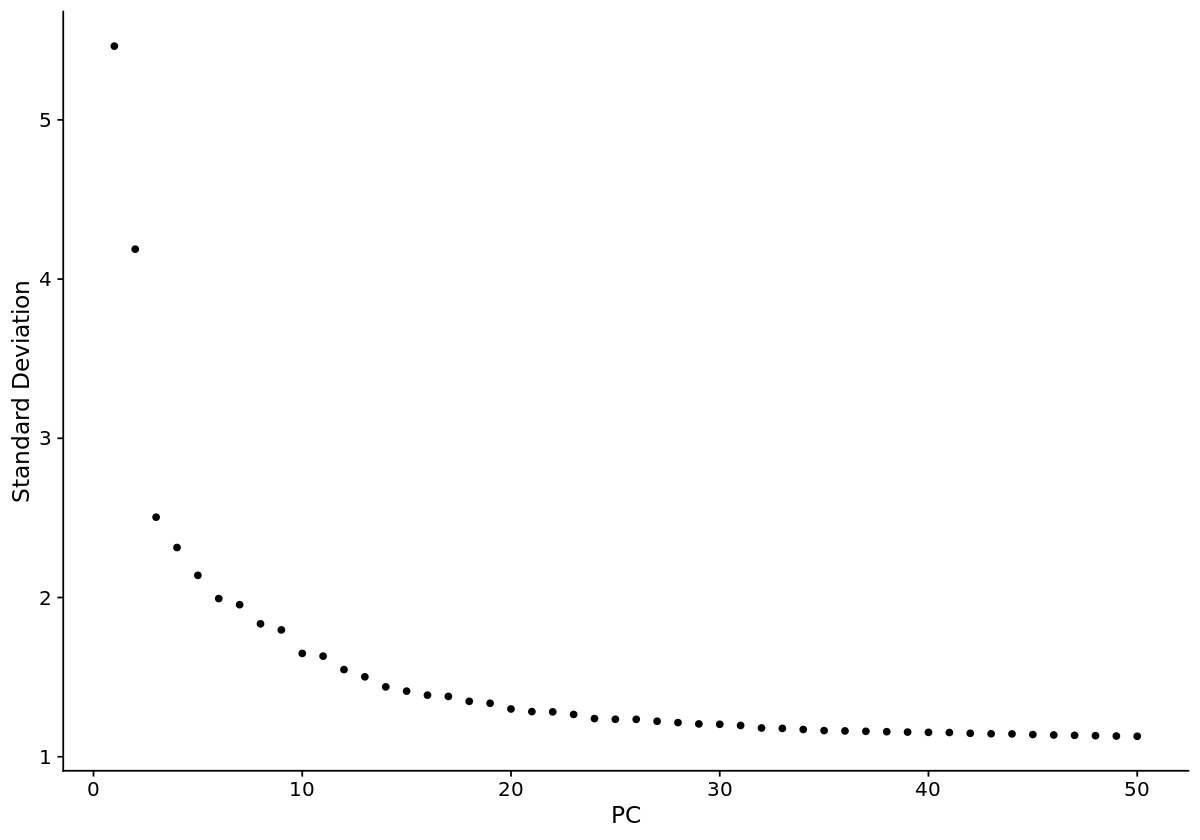

In [10]:
ogd_pool <- RunPCA(object = ogd_pool)

ElbowPlot(object = ogd_pool, ndims = 50)

In [11]:
ogd_pool <- FindNeighbors(ogd_pool, dims = 1:15, verbose = FALSE)
ogd_pool <- FindClusters(ogd_pool, resolution = 0.6, verbose = FALSE)

ogd_pool <- RunUMAP(ogd_pool, dims = 1:15, verbose = FALSE)


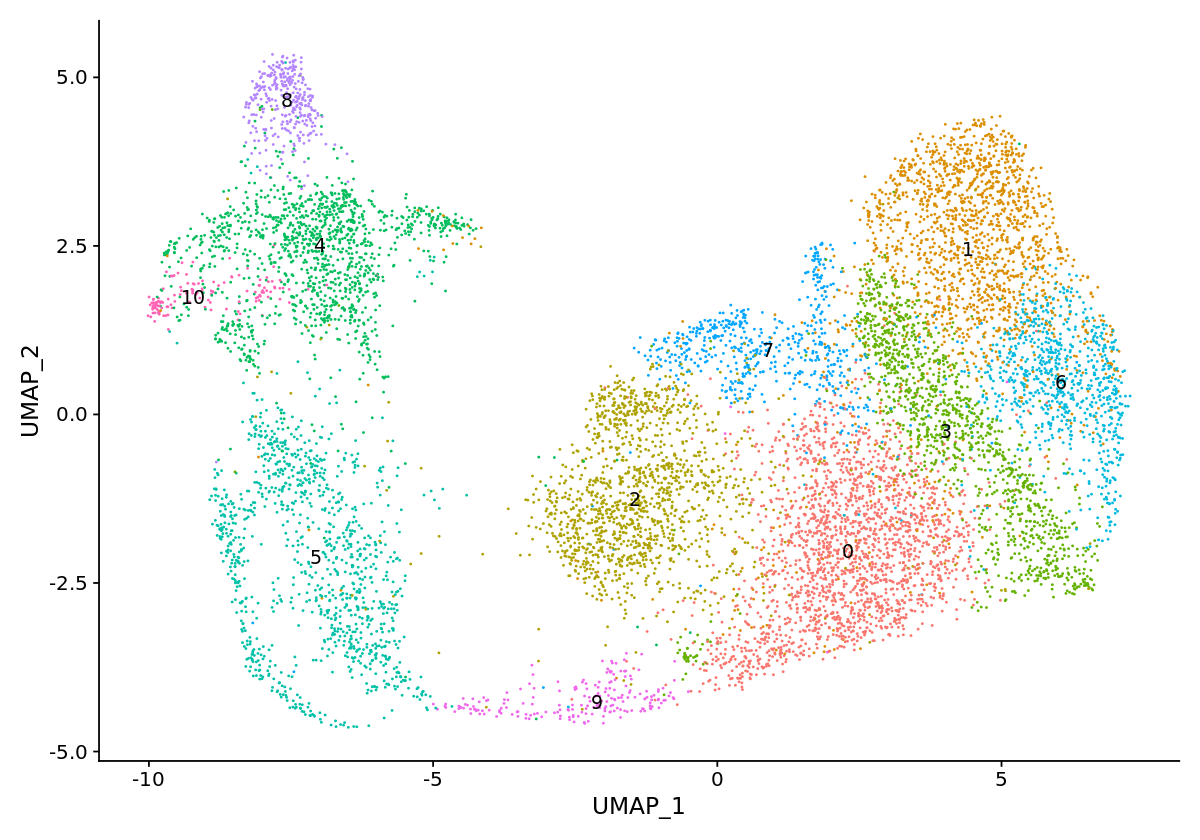

In [12]:
options(repr.plot.width=10, repr.plot.height=7)

DimPlot(ogd_pool, label = TRUE) + NoLegend()

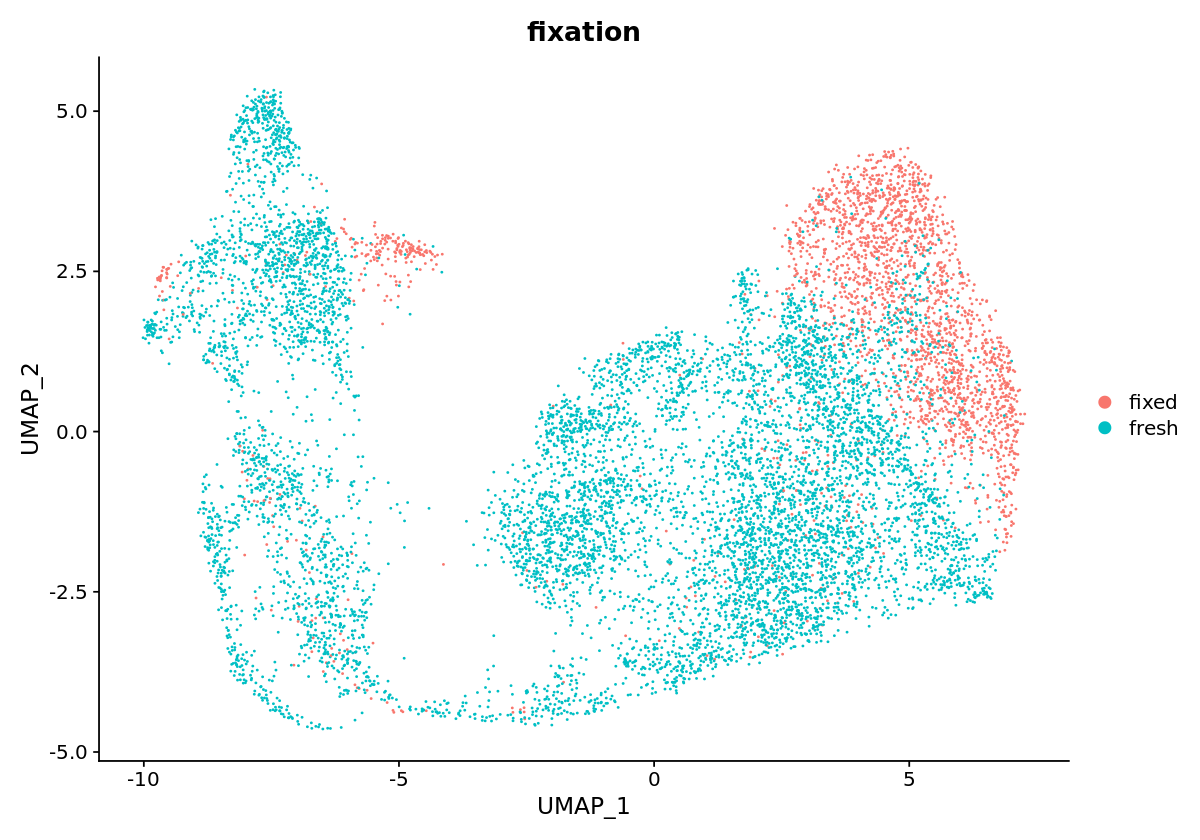

In [13]:
options(repr.plot.width=10, repr.plot.height=7)

DimPlot(ogd_pool, group.by = "fixation")

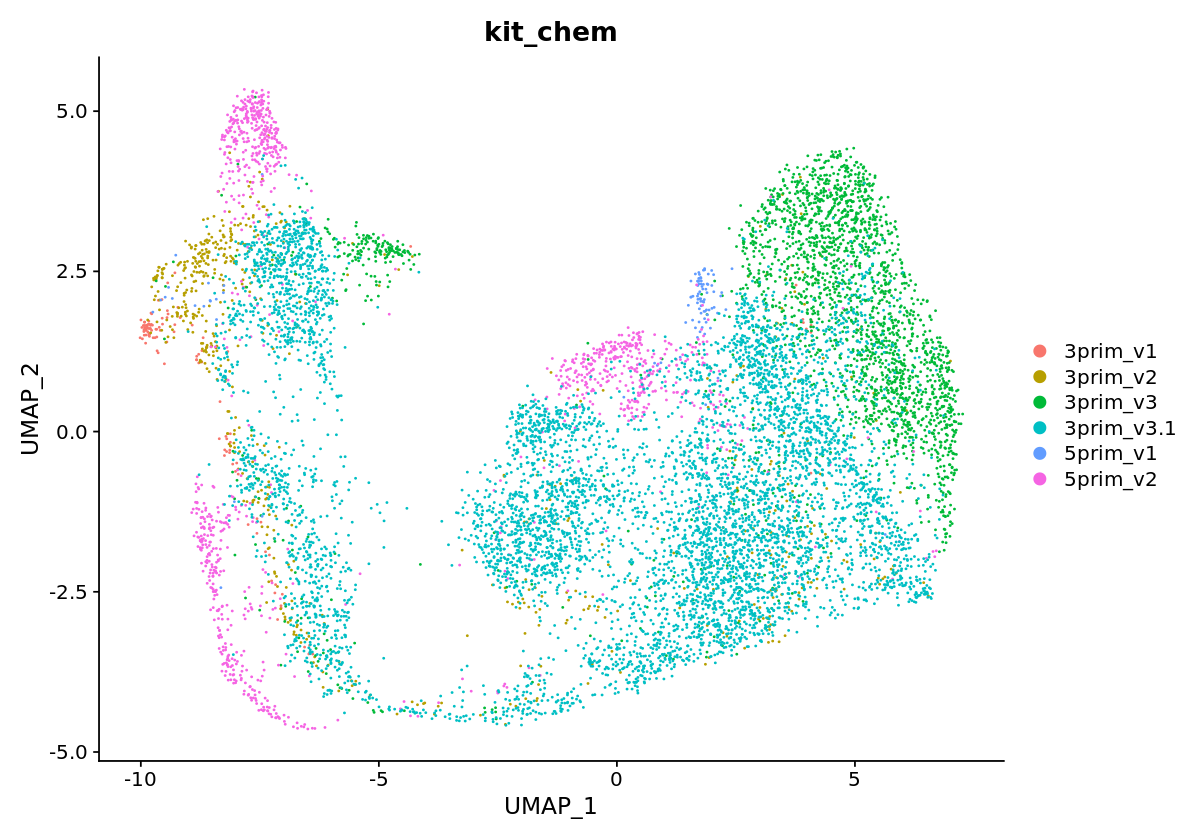

In [14]:
options(repr.plot.width=10, repr.plot.height=7)

DimPlot(ogd_pool, group.by = "kit_chem")

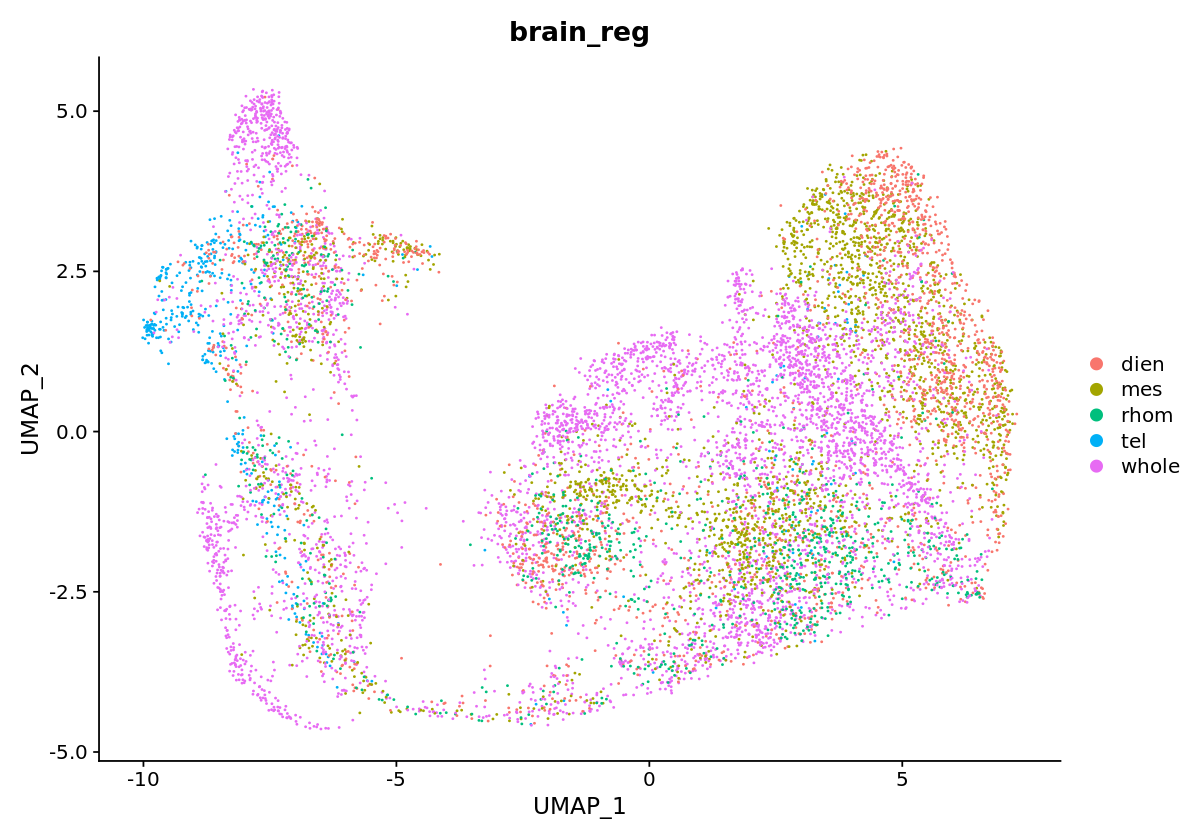

In [15]:
options(repr.plot.width=10, repr.plot.height=7)

DimPlot(ogd_pool, group.by = "brain_reg")

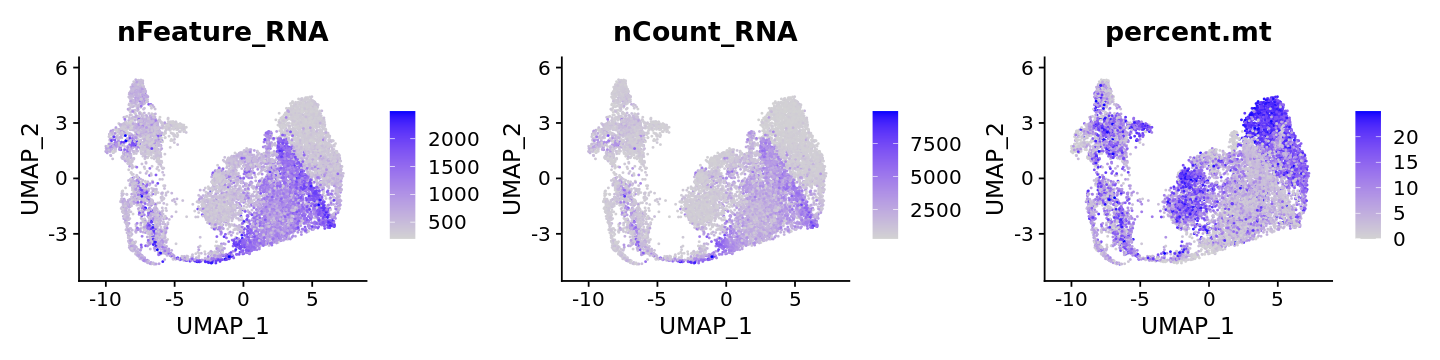

In [16]:
options(repr.plot.width=12, repr.plot.height=3)

FeaturePlot(ogd_pool, features = c("nFeature_RNA","nCount_RNA","percent.mt"), ncol = 3, raster = FALSE)

### Clustering with regression of all covariates (including orig.ident)

In [2]:
ogd_pool_2 <- readRDS(file = "/local/Nina/jupyterlab/brains_trans/ogd_pool_in.rds")

In [3]:
ogd_pool_2 <- NormalizeData(object = ogd_pool_2, normalization.method = "LogNormalize", scale.factor = 1e4)

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 2621 rows containing missing values (geom_point).”
Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


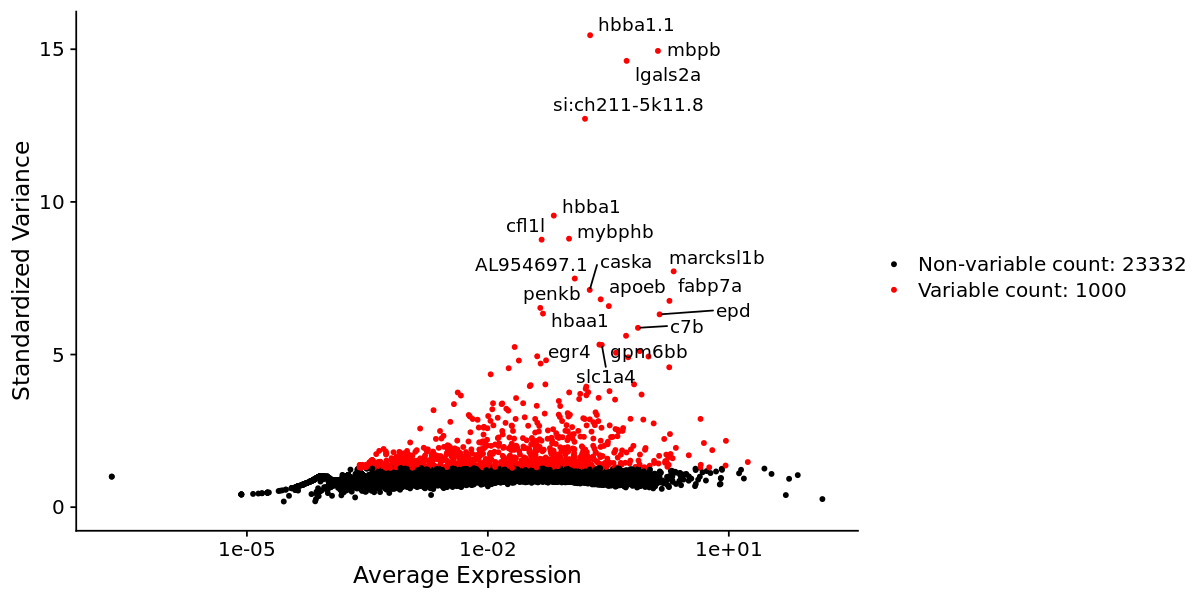

In [4]:
options(repr.plot.width=10, repr.plot.height=5)

ogd_pool_2 <- FindVariableFeatures(object = ogd_pool_2, selection.method = 'vst', nfeatures = 1000)

#plot variable features with top vargenes labeled
top20 <- head(x = VariableFeatures(object = ogd_pool_2), 20)
plot_var_feat <- LabelPoints(plot = VariableFeaturePlot(object = ogd_pool_2), points = top20, repel = TRUE)
plot_var_feat

In [5]:
all.genes <- rownames(x = ogd_pool_2)
ogd_pool_2 <- ScaleData(object = ogd_pool_2, features = all.genes, vars.to.regress = c("nFeature_RNA","nCount_RNA","percent.mt", "orig.ident"))

Regressing out nFeature_RNA, nCount_RNA, percent.mt, orig.ident

Centering and scaling data matrix



In [6]:
str(ogd_pool_2@commands)

List of 7
 $ RunPCA.RNA              :Formal class 'SeuratCommand' [package "SeuratObject"] with 5 slots
  .. ..@ name       : chr "RunPCA.RNA"
  .. ..@ time.stamp : POSIXct[1:1], format: "2022-04-28 12:50:50"
  .. ..@ assay.used : chr "RNA"
  .. ..@ call.string: chr "RunPCA(object = brain_pool)"
  .. ..@ params     :List of 10
  .. .. ..$ assay          : chr "RNA"
  .. .. ..$ npcs           : num 50
  .. .. ..$ rev.pca        : logi FALSE
  .. .. ..$ weight.by.var  : logi TRUE
  .. .. ..$ verbose        : logi TRUE
  .. .. ..$ ndims.print    : int [1:5] 1 2 3 4 5
  .. .. ..$ nfeatures.print: num 30
  .. .. ..$ reduction.name : chr "pca"
  .. .. ..$ reduction.key  : chr "PC_"
  .. .. ..$ seed.use       : num 42
 $ FindNeighbors.RNA.pca   :Formal class 'SeuratCommand' [package "SeuratObject"] with 5 slots
  .. ..@ name       : chr "FindNeighbors.RNA.pca"
  .. ..@ time.stamp : POSIXct[1:1], format: "2022-04-28 13:37:33"
  .. ..@ assay.used : chr "RNA"
  .. ..@ call.string: chr "FindNeig

PC_ 1 
Positive:  gpm6bb, marcksl1b, tnr, traf4a, si:dkey-56m19.5, fabp7a, bcan, draxin, sox6, igsf9ba 
	   vstm4b, lgals2a, dscamb, si:busm1-57f23.1, sema5a, mtss1lb, caska, gpm6aa, vegfab, relt 
	   proca1, hsph1, prom2, srgap3, zgc:66433, slc1a4, sox2, syt9b, egfra, mcl1a 
Negative:  si:dkey-200l5.4, si:rp71-19m20.1, si:dkeyp-73d8.8, cdaa, crp1, mag, glula, glipr2l, clic2, ptmaa 
	   tcima, tuft1a, htra1a, sept5a, CR936442.1, si:ch211-195b13.1, ggctb, map4l, vim, crip3 
	   cahz, ap1s3b, si:dkeyp-73d8.9, nes, si:dkeyp-72h1.1, zgc:92249, slc7a10a, sult2st1, pkd1l2a, mtbl 
PC_ 2 
Positive:  sema5a, aplnra, aplnrb, gria2b, igsf9ba, scg3, si:ch211-113g11.6, cspg5a, gria4a, spock3 
	   kiaa1549la, sparcl1, nptx1l, cxcl12a, slc1a1, spock2, grin1a, cadm3, ptprn2, bcan 
	   olig1, slc1a2b, scg2b, syt9b, gria3b, CR786577.1, traf4a, gpm6aa, cd9a, cacng4a 
Negative:  c7b, slc1a4, vstm4b, caska, sema4ga, vstm4a, prom2, ninj2, si:ch211-286c4.6, srgap3 
	   rnd3a, si:ch211-132b12.8, tpcn1, si:dke

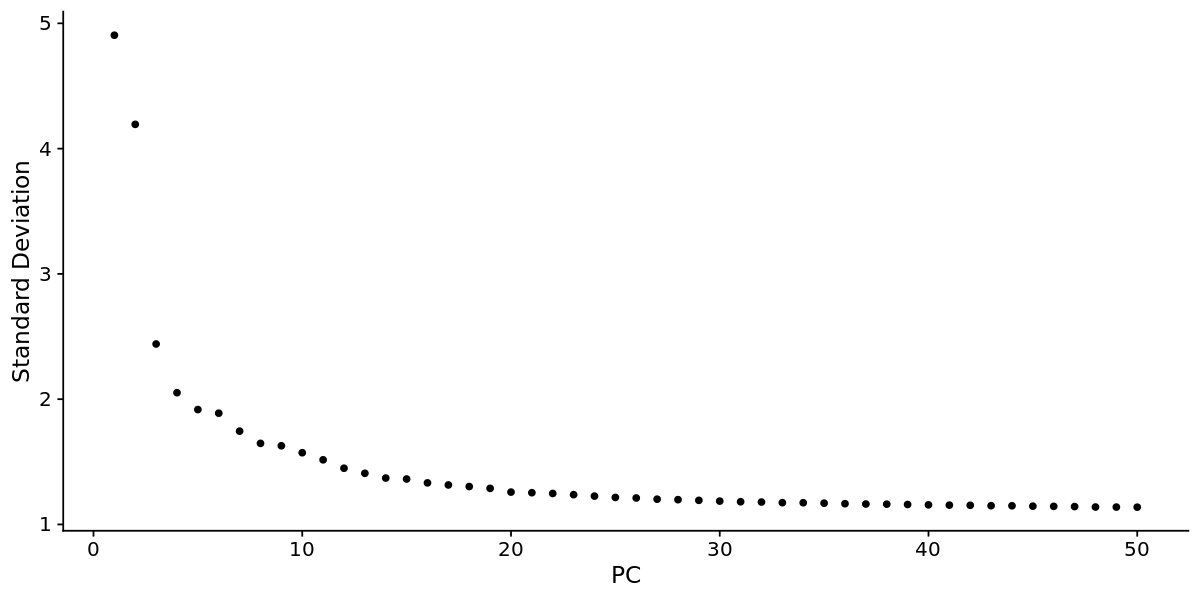

In [7]:
ogd_pool_2 <- RunPCA(object = ogd_pool_2)

ElbowPlot(object = ogd_pool_2, ndims = 50)

In [8]:
ogd_pool_2 <- FindNeighbors(ogd_pool_2, dims = 1:20, verbose = FALSE)
ogd_pool_2 <- FindClusters(ogd_pool_2, resolution = 0.6, verbose = FALSE)

ogd_pool_2 <- RunUMAP(ogd_pool_2, dims = 1:20, verbose = FALSE)


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


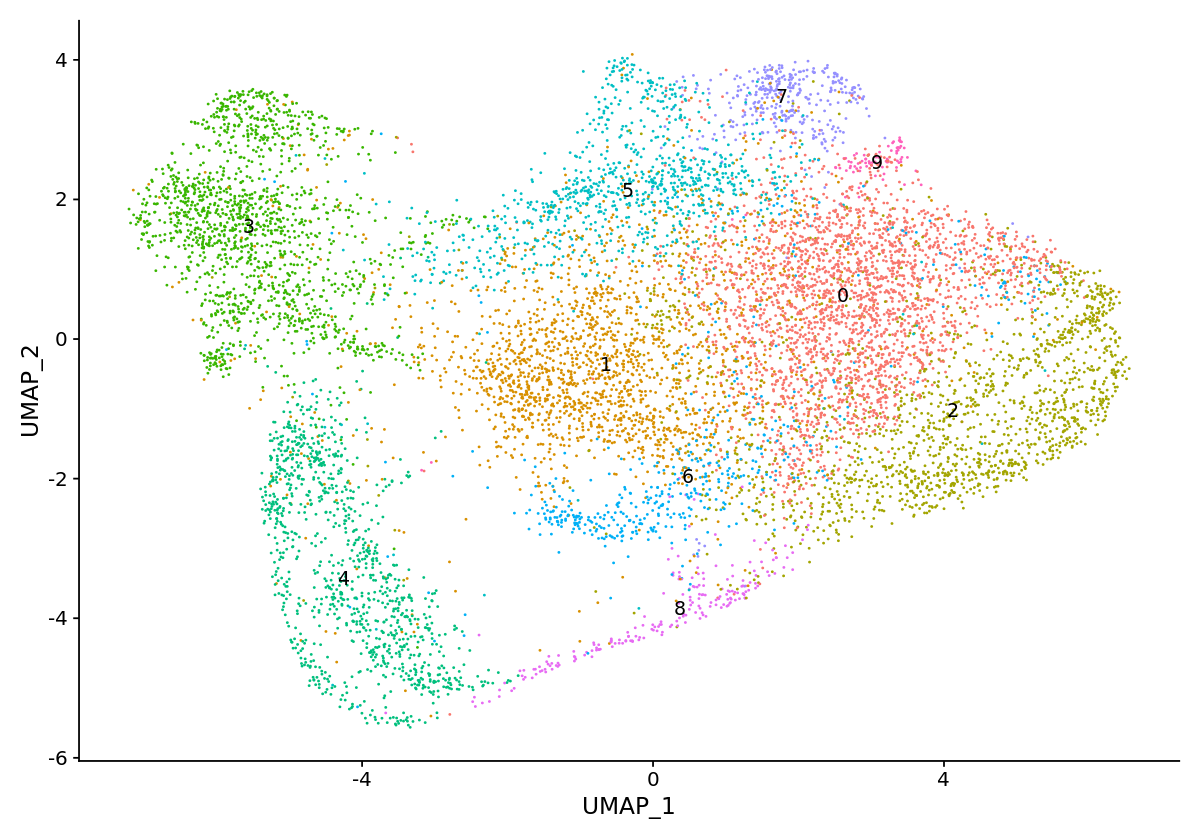

In [9]:
options(repr.plot.width=10, repr.plot.height=7)

DimPlot(ogd_pool_2, label = TRUE) + NoLegend()

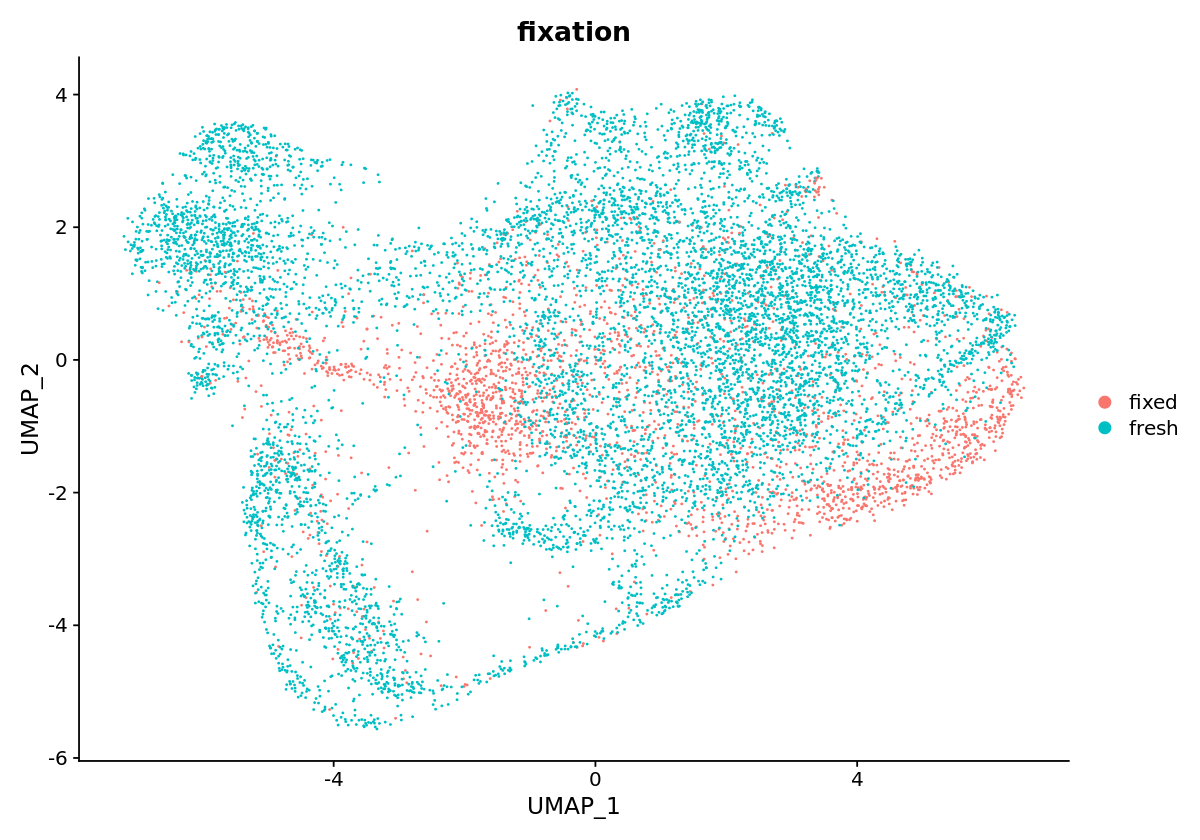

In [10]:
options(repr.plot.width=10, repr.plot.height=7)

DimPlot(ogd_pool_2, group.by = "fixation")

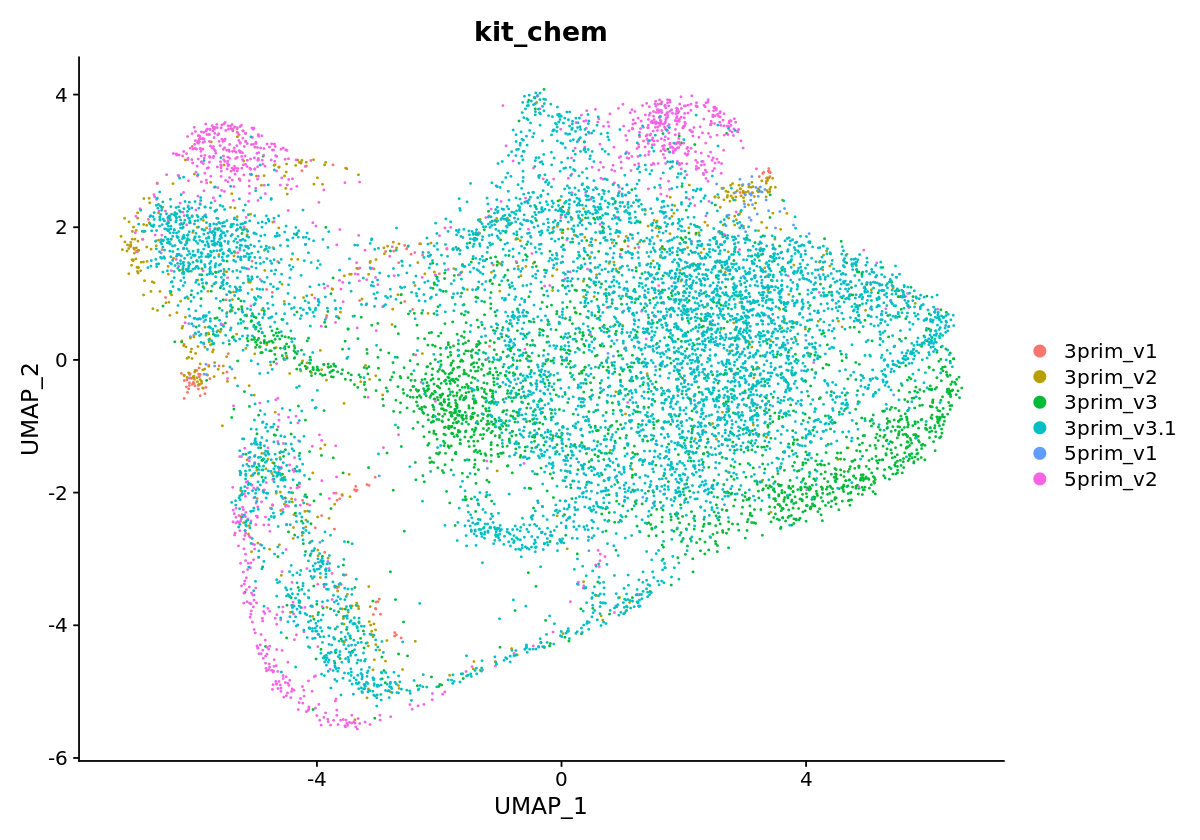

In [11]:
options(repr.plot.width=10, repr.plot.height=7)

DimPlot(ogd_pool_2, group.by = "kit_chem")

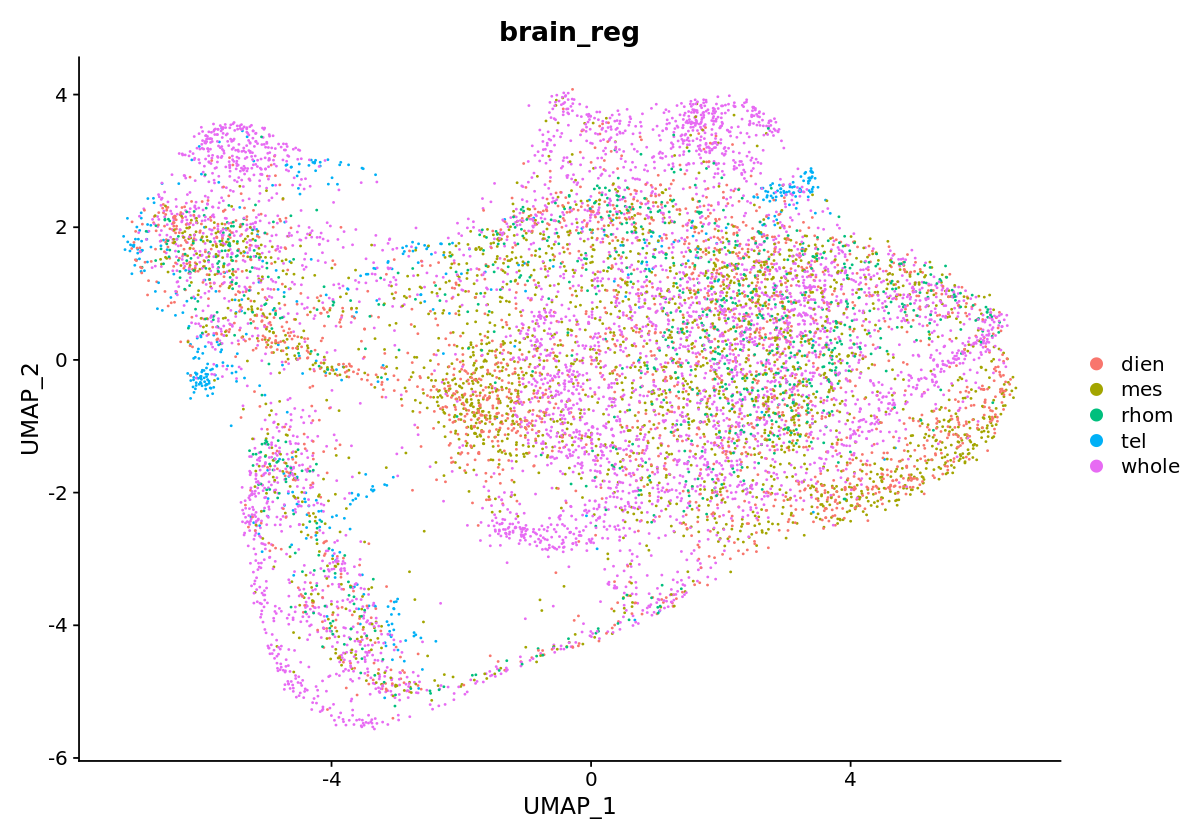

In [12]:
options(repr.plot.width=10, repr.plot.height=7)

DimPlot(ogd_pool_2, group.by = "brain_reg")

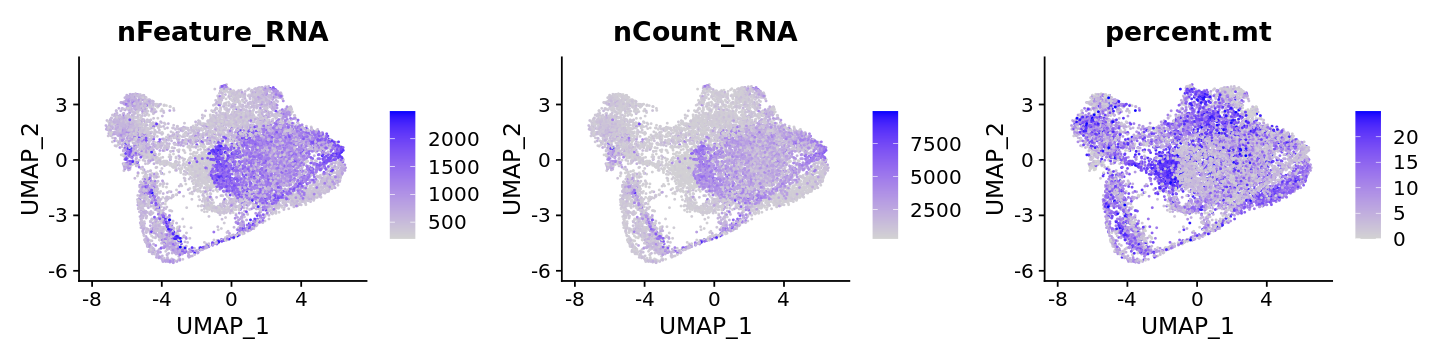

In [13]:
options(repr.plot.width=12, repr.plot.height=3)

FeaturePlot(ogd_pool_2, features = c("nFeature_RNA","nCount_RNA","percent.mt"), ncol = 3, raster = FALSE)

In [14]:
# save embedding with regression
saveRDS(ogd_pool_2, file = "/local/Nina/jupyterlab/brains_trans/ogd_pool_reg.rds")

### Identify cluster-specific markers
Use the embedding with regression of all covariates.

In [ ]:
#ogd_pool <- readRDS(file = "/local/Nina/jupyterlab/brains_trans/ogd_pool_reg.rds")

In [15]:
ogd_pool <- ogd_pool_2

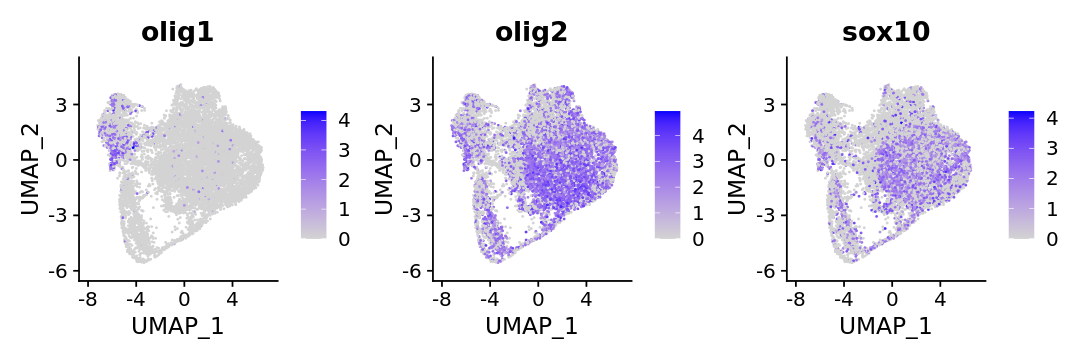

In [25]:
options(repr.plot.width=9, repr.plot.height=3)

#quick check of known ogd markers markers
FeaturePlot(ogd_pool, features = c("olig1", "olig2", "sox10"), ncol = 3)

In [57]:
# save original numeric names as separate metadata
ogd_pool$pc20_res0.6_clusters_numeric <- Idents(ogd_pool)

#### Find and select useful markers

In [16]:
# find markers
ogd_pool.mct.markers.bimod <- FindAllMarkers(object = ogd_pool, only.pos = TRUE, min.pct = 0.2, logfc.threshold = 0.2, test.use = "bimod")
ogd_pool.mct.markers.bimod %>% group_by(cluster) %>% top_n(n = 2, wt = avg_log2FC)
write.csv(ogd_pool.mct.markers.bimod, file = "/local/Nina/jupyterlab/brains_trans/ogd_pool_reg_20pcs_res0-6_markers_bimod.csv")

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9



p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster gene            
1   0.000000e+00 1.353335   0.991 0.743  0.000000e+00 0       cd59            
2   0.000000e+00 1.333002   0.907 0.447  0.000000e+00 0       csrp1b          
3   0.000000e+00 1.638711   0.983 0.879  0.000000e+00 1       hsp90aa1.2      
4  3.338199e-290 1.465114   0.915 0.761 8.122505e-286 1       hsp70.3         
5  3.727744e-218 1.568776   0.682 0.322 9.070346e-214 2       glulb           
6  4.080616e-165 1.597288   0.547 0.239 9.928955e-161 2       vim             
7   0.000000e+00 4.342937   0.691 0.018  0.000000e+00 3       aplnra          
8   0.000000e+00 4.312453   0.811 0.043  0.000000e+00 3       sema5a          
9   0.000000e+00 4.295229   0.757 0.087  0.000000e+00 4       gpm6bb          
10  0.000000e+00 3.931201   0.594 0.069  0.000000e+00 4       lgals2a         
11 6.716704e-256 2.296807   0.701 0.173 1.634309e-251 5       epd             
12  1.196548e-73 2.111515   0.230 0.051  2.911442e-69 5       hbba1.1         
13  1.530690e-85 1.229254   0.860 0.623  3.724476e-81 6       si:dkey-205h13.1
14  3.964752e-83 1.192427   0.795 0.539  9.647035e-79 6       ly75            
15  0.000000e+00 3.331595   0.932 0.478  0.000000e+00 7       crp1            
16 4.351153e-124 2.451294   0.433 0.074 1.058723e-119 7       lgi3            
17 1.048965e-295 4.189457   0.934 0.322 2.552342e-291 8       mbpb            
18 7.073225e-203 3.548789   0.697 0.023 1.721057e-198 8       mybphb          
19  3.239399e-15 1.753929   0.231 0.058  7.882107e-11 9       stmn1a          
20  2.946076e-10 2.064609   0.282 0.110  7.168391e-06 9       RFP

Use FeaturePlots (below) to inspect all clusters, then record cluster-specific markers (unique ones if possible and those shared between subset of clusters). Based on this I will merge clusters that share a similar expression profile.

In [17]:
table(ogd_pool@active.ident)


   0    1    2    3    4    5    6    7    8    9 
2516 2071 1683 1548 1041  906  542  353  211   78 

In [49]:
# record genes with specific spatial expression for each cluster (unique and shared with other clusters)
unique_markers <- list()
unique_markers[["cluster_0"]] <- c() # none unique
unique_markers[["cluster_1"]] <- c("atp1b1b", # this gene seen in a methanol fixation batch of RG 
                                   "hspa4a") # unique markers indicate diss response/technical variance
unique_markers[["cluster_2"]] <- c("asah1b")
unique_markers[["cluster_3"]] <- c("aplnra", "sema5a", "aplnrb", "gria2b", "scg3", "cxcl12a", "nptx1l")
unique_markers[["cluster_4"]] <- c("gpm6bb", "lgals2a", "c7b", "gpr17", "tnr", "vstm4b", "vcanb", "prom2")
unique_markers[["cluster_5"]] <- c("hbba1.1", "apoc1", "cd74a", "ccl34b.1", "snap25b") # these indicate either ambient contamination or doublets
unique_markers[["cluster_6"]] <- c() # none unique
unique_markers[["cluster_7"]] <- c("lgi3", "PPP1CC")
unique_markers[["cluster_8"]] <- c("mbpb", "mybphb", "cfl1l", "apoeb", "tcf7l2")
unique_markers[["cluster_9"]] <- c() # none unique

In [50]:
# shared across multiple
shared_markers <- list()
shared_markers[["cluster_0"]] <- c("cd59", "mbpa", "mpz", "glula", "plp1b", "cd9b", "elovl1b", #shared mostly with 1, 2, 5, 6, 7, 8, 9
                                  "csrp1b", "glipr2l", "fabp2", "tcima", "clic2", "sept5a", "sept8b" # shared with 1, 6, 2, 9
                                  )
shared_markers[["cluster_1"]] <- c("tuft1a") # shared with 0, 6, 2, 9
shared_markers[["cluster_2"]] <- c("vim", #some in 0/1
                                  "map4l", "gpt2l", "tuft1a", "clasp2" # shared with 0, 6, 1, 9
                                  )
shared_markers[["cluster_3"]] <- c("igsf9ba", "traf4a", "bcan", "dscamb", "slc1a2b") #shared with 4
shared_markers[["cluster_4"]] <- c("draxin", # partially shared with 3
                                  "slc1a4" # partially shared with 8
                                  )
shared_markers[["cluster_5"]] <- c("epd") # also hinting at contamination/doublets (due to wide spread expression more likely contamination)
shared_markers[["cluster_6"]] <- c() # large overlap with 0,1,2 markers already listed there
shared_markers[["cluster_7"]] <- c("crp1", "tegt")
shared_markers[["cluster_8"]] <- c("rhbdl3", "calm3a", "slc1a4", "caska")
shared_markers[["cluster_9"]] <- c() # large overlap with 0,1,2,6 markers already listed there

In [18]:
# get genes from single cluster in desc fold change order
genes.single.cluster.bimod <- function(x, markerlist){
  genes.only <- markerlist %>% filter (cluster ==x ) %>% arrange(desc(avg_log2FC)) %>% select(gene)
}

# get genes for each cluster 
for (cluster in levels(ogd_pool@active.ident)) {
  genelist.cluster <- genes.single.cluster.bimod(cluster, ogd_pool.mct.markers.bimod)
  genelist.cluster <- genelist.cluster$gene
  topgenes <- head(genelist.cluster, 40)
  assign(paste0("cluster_",cluster, "_top40"), topgenes)
}

In [ ]:
options(repr.plot.width=16, repr.plot.height=30)

FeaturePlot(object = ogd_pool, reduction = 'umap', features = cluster_8_top40, 
            ncol = 4, cols = c("lightgrey","mediumblue"),
           raster = FALSE)

In [ ]:
options(repr.plot.width=16, repr.plot.height=30)

FeaturePlot(object = ogd_pool, reduction = 'umap', features = cluster_9_top40, 
            ncol = 4, cols = c("lightgrey","mediumblue"),
           raster = FALSE)

Use DotPlot to validate and if necessary refine marker selection.

In [51]:
unique_markers_vector <- unlist(unique_markers)
unique_markers_vector <- unname(unique_markers_vector)
unique_markers_vector

[1] "atp1b1b"  "hspa4a"   "asah1b"   "aplnra"   "sema5a"   "aplnrb"  
 [7] "gria2b"   "scg3"     "cxcl12a"  "nptx1l"   "gpm6bb"   "lgals2a" 
[13] "c7b"      "gpr17"    "tnr"      "vstm4b"   "vcanb"    "prom2"   
[19] "hbba1.1"  "apoc1"    "cd74a"    "ccl34b.1" "snap25b"  "lgi3"    
[25] "PPP1CC"   "mbpb"     "mybphb"   "cfl1l"    "apoeb"    "tcf7l2"

In [52]:
shared_markers_vector <- unlist(shared_markers)
shared_markers_vector <- unname(shared_markers_vector)
#remove duplicates
shared_markers_vector <- unique(shared_markers_vector)
shared_markers_vector

[1] "cd59"    "mbpa"    "mpz"     "glula"   "plp1b"   "cd9b"    "elovl1b"
 [8] "csrp1b"  "glipr2l" "fabp2"   "tcima"   "clic2"   "sept5a"  "sept8b" 
[15] "tuft1a"  "vim"     "map4l"   "gpt2l"   "clasp2"  "igsf9ba" "traf4a" 
[22] "bcan"    "dscamb"  "slc1a2b" "draxin"  "slc1a4"  "epd"     "crp1"   
[29] "tegt"    "rhbdl3"  "calm3a"  "caska"

In [53]:
# plot together
all_markers_vector <- c(unique_markers_vector, shared_markers_vector)
all_markers_vector <- unique(all_markers_vector)

In [54]:
length(all_markers_vector)

[1] 62

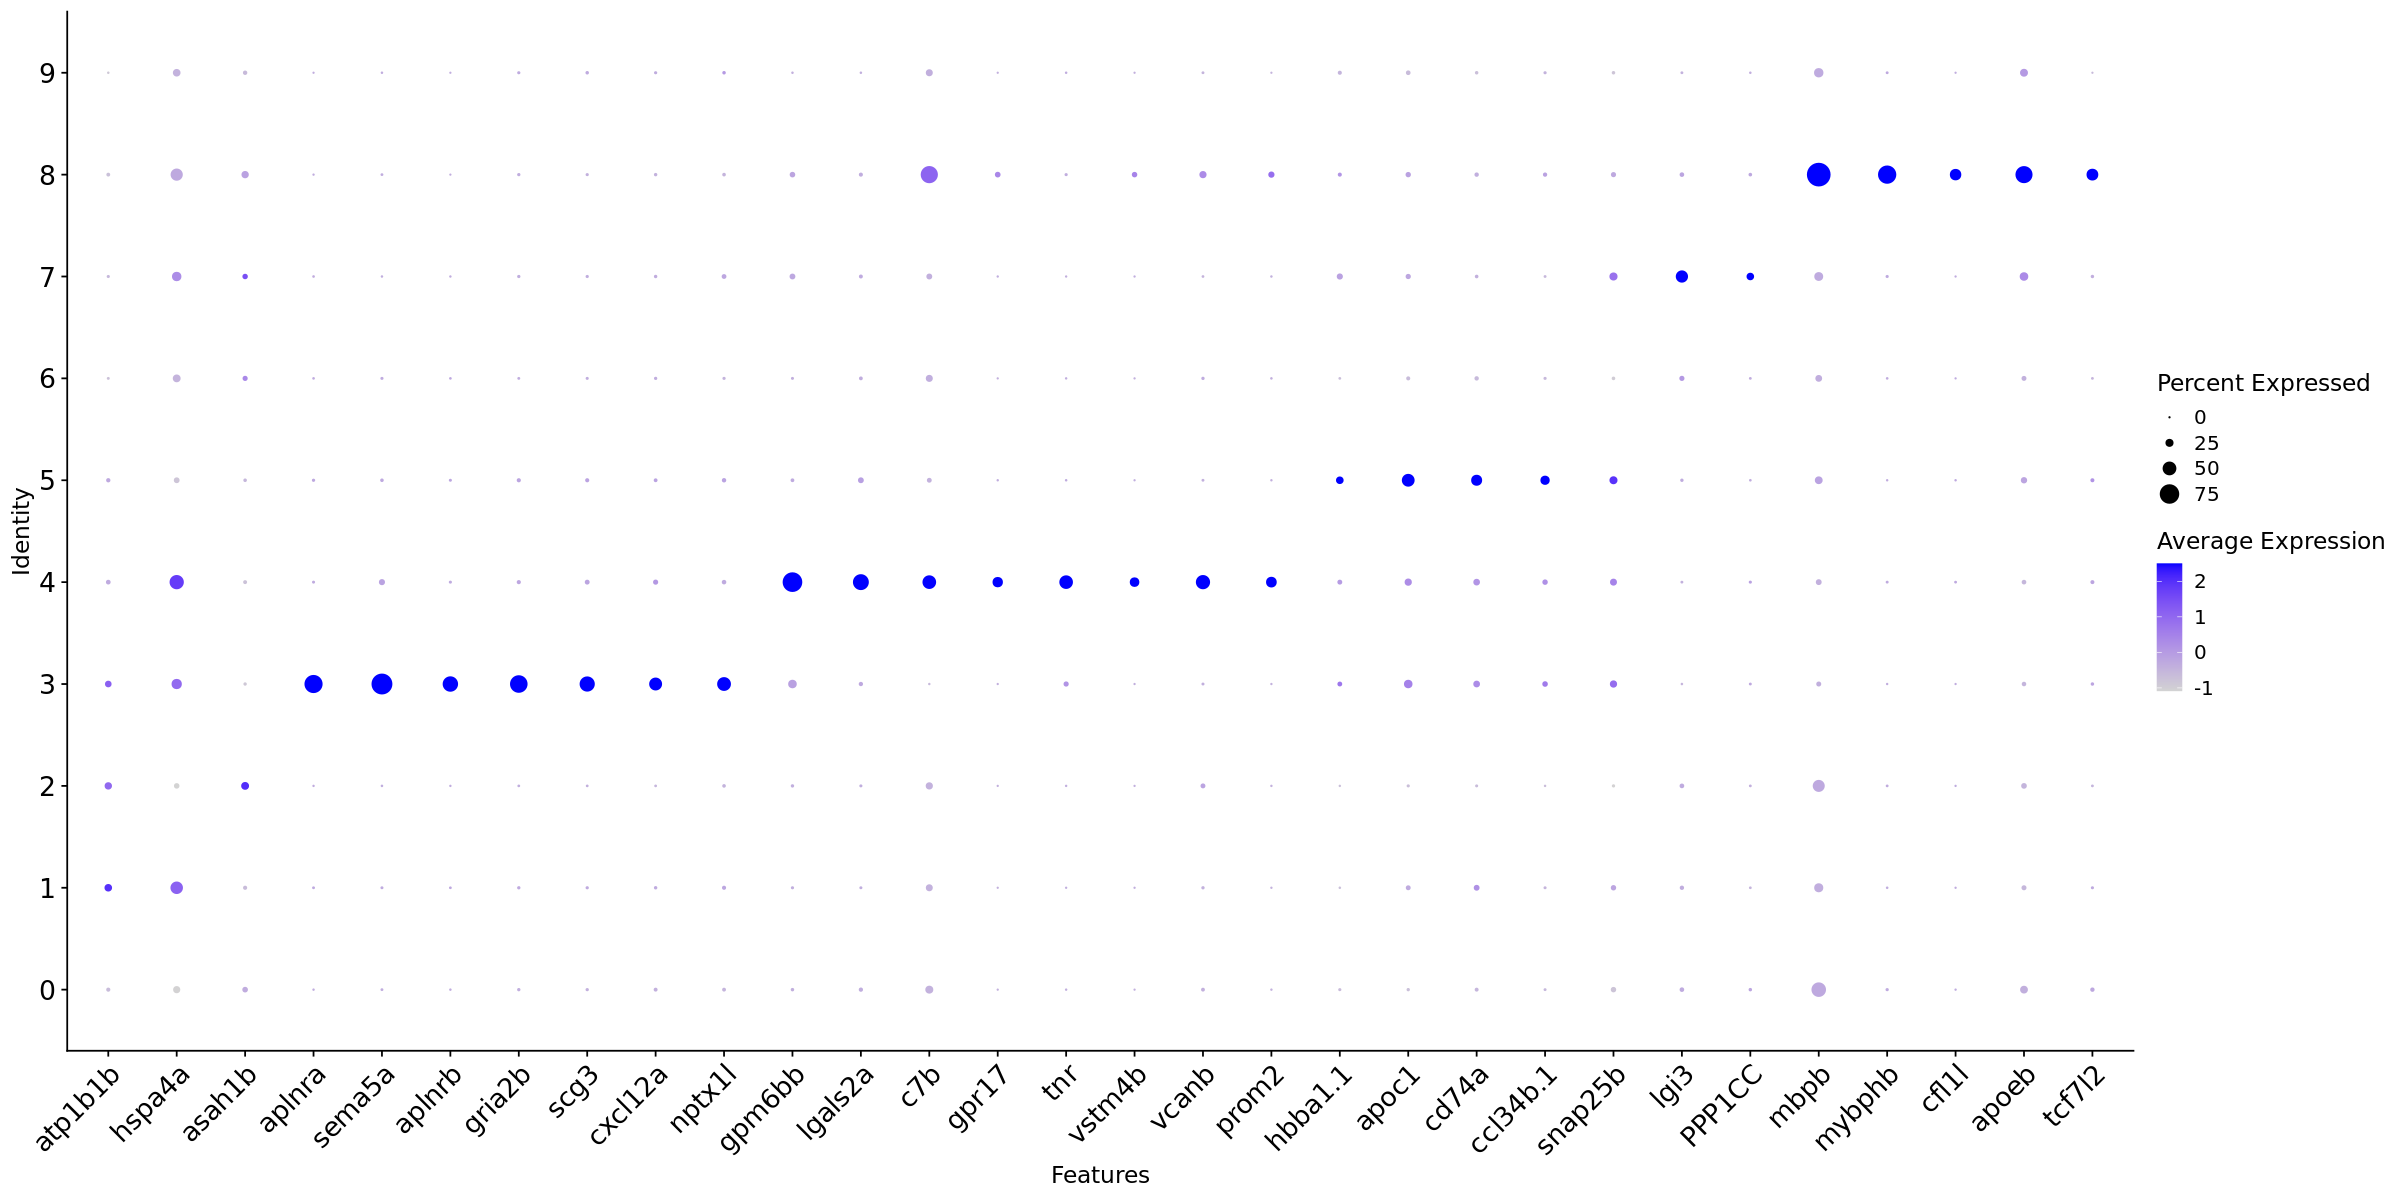

In [56]:
options(repr.plot.width=20, repr.plot.height=10)

dotplot_unique <- DotPlot(ogd_pool, features = unique_markers_vector) + theme(axis.text.x = element_text(angle = 45, size = 16, hjust = 1, vjust = 1), axis.text.y = element_text(size = 16)) + RotatedAxis()
dotplot_unique

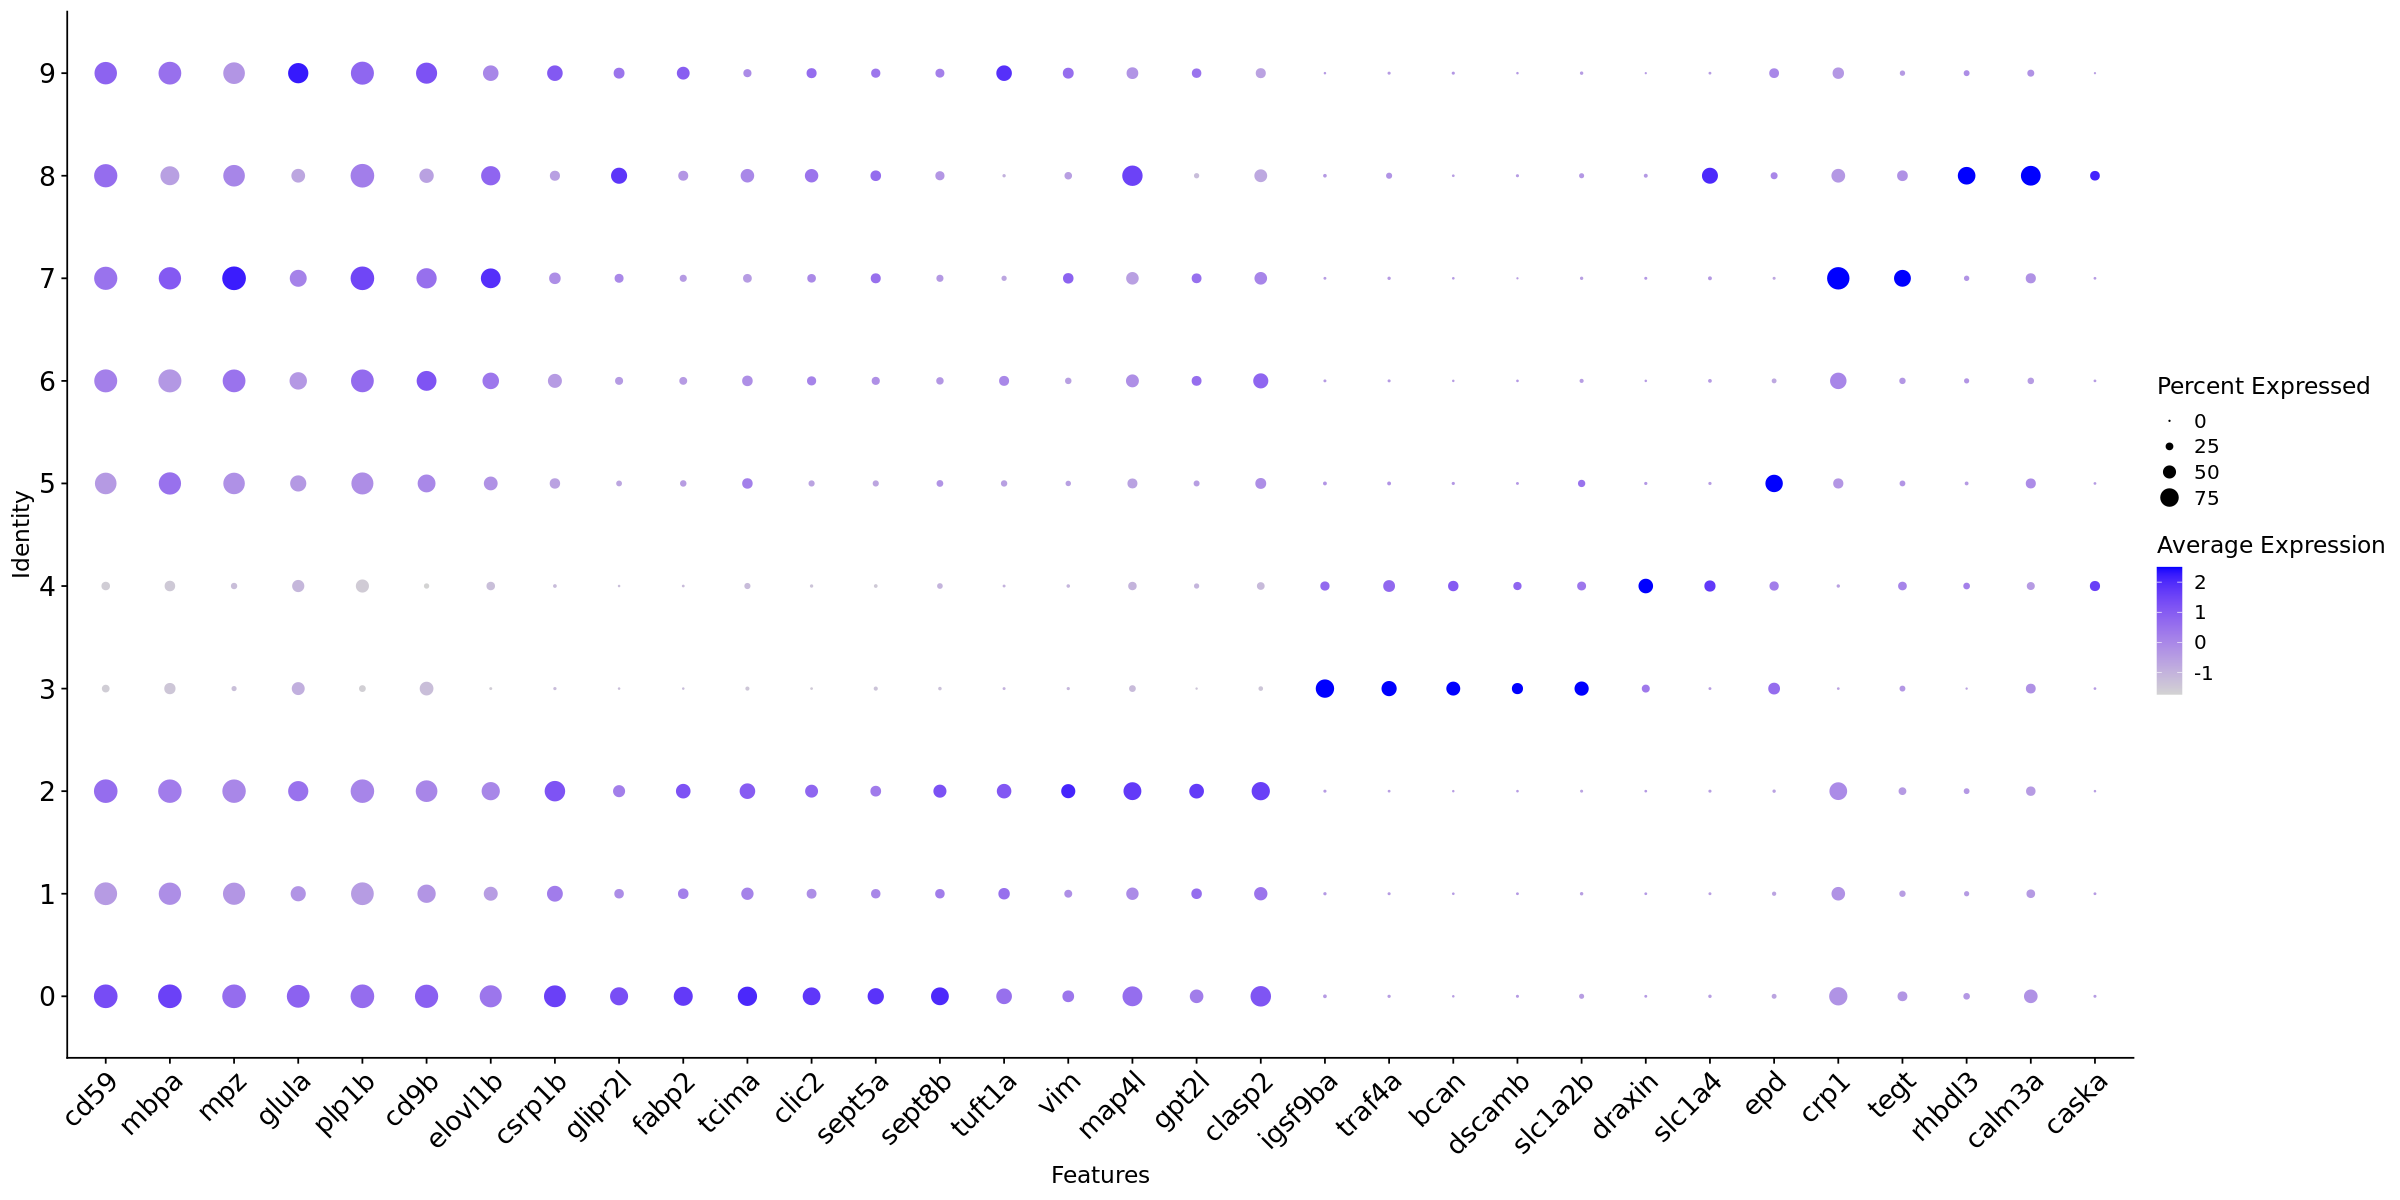

In [47]:
options(repr.plot.width=20, repr.plot.height=10)

dotplot_shared <- DotPlot(ogd_pool, features = shared_markers_vector) + theme(axis.text.x = element_text(angle = 45, size = 16, hjust = 1, vjust = 1), axis.text.y = element_text(size = 16)) + RotatedAxis()
dotplot_shared

Warning message in FetchData(object = object, vars = features, cells = cells):
“The following requested variables were not found: ”


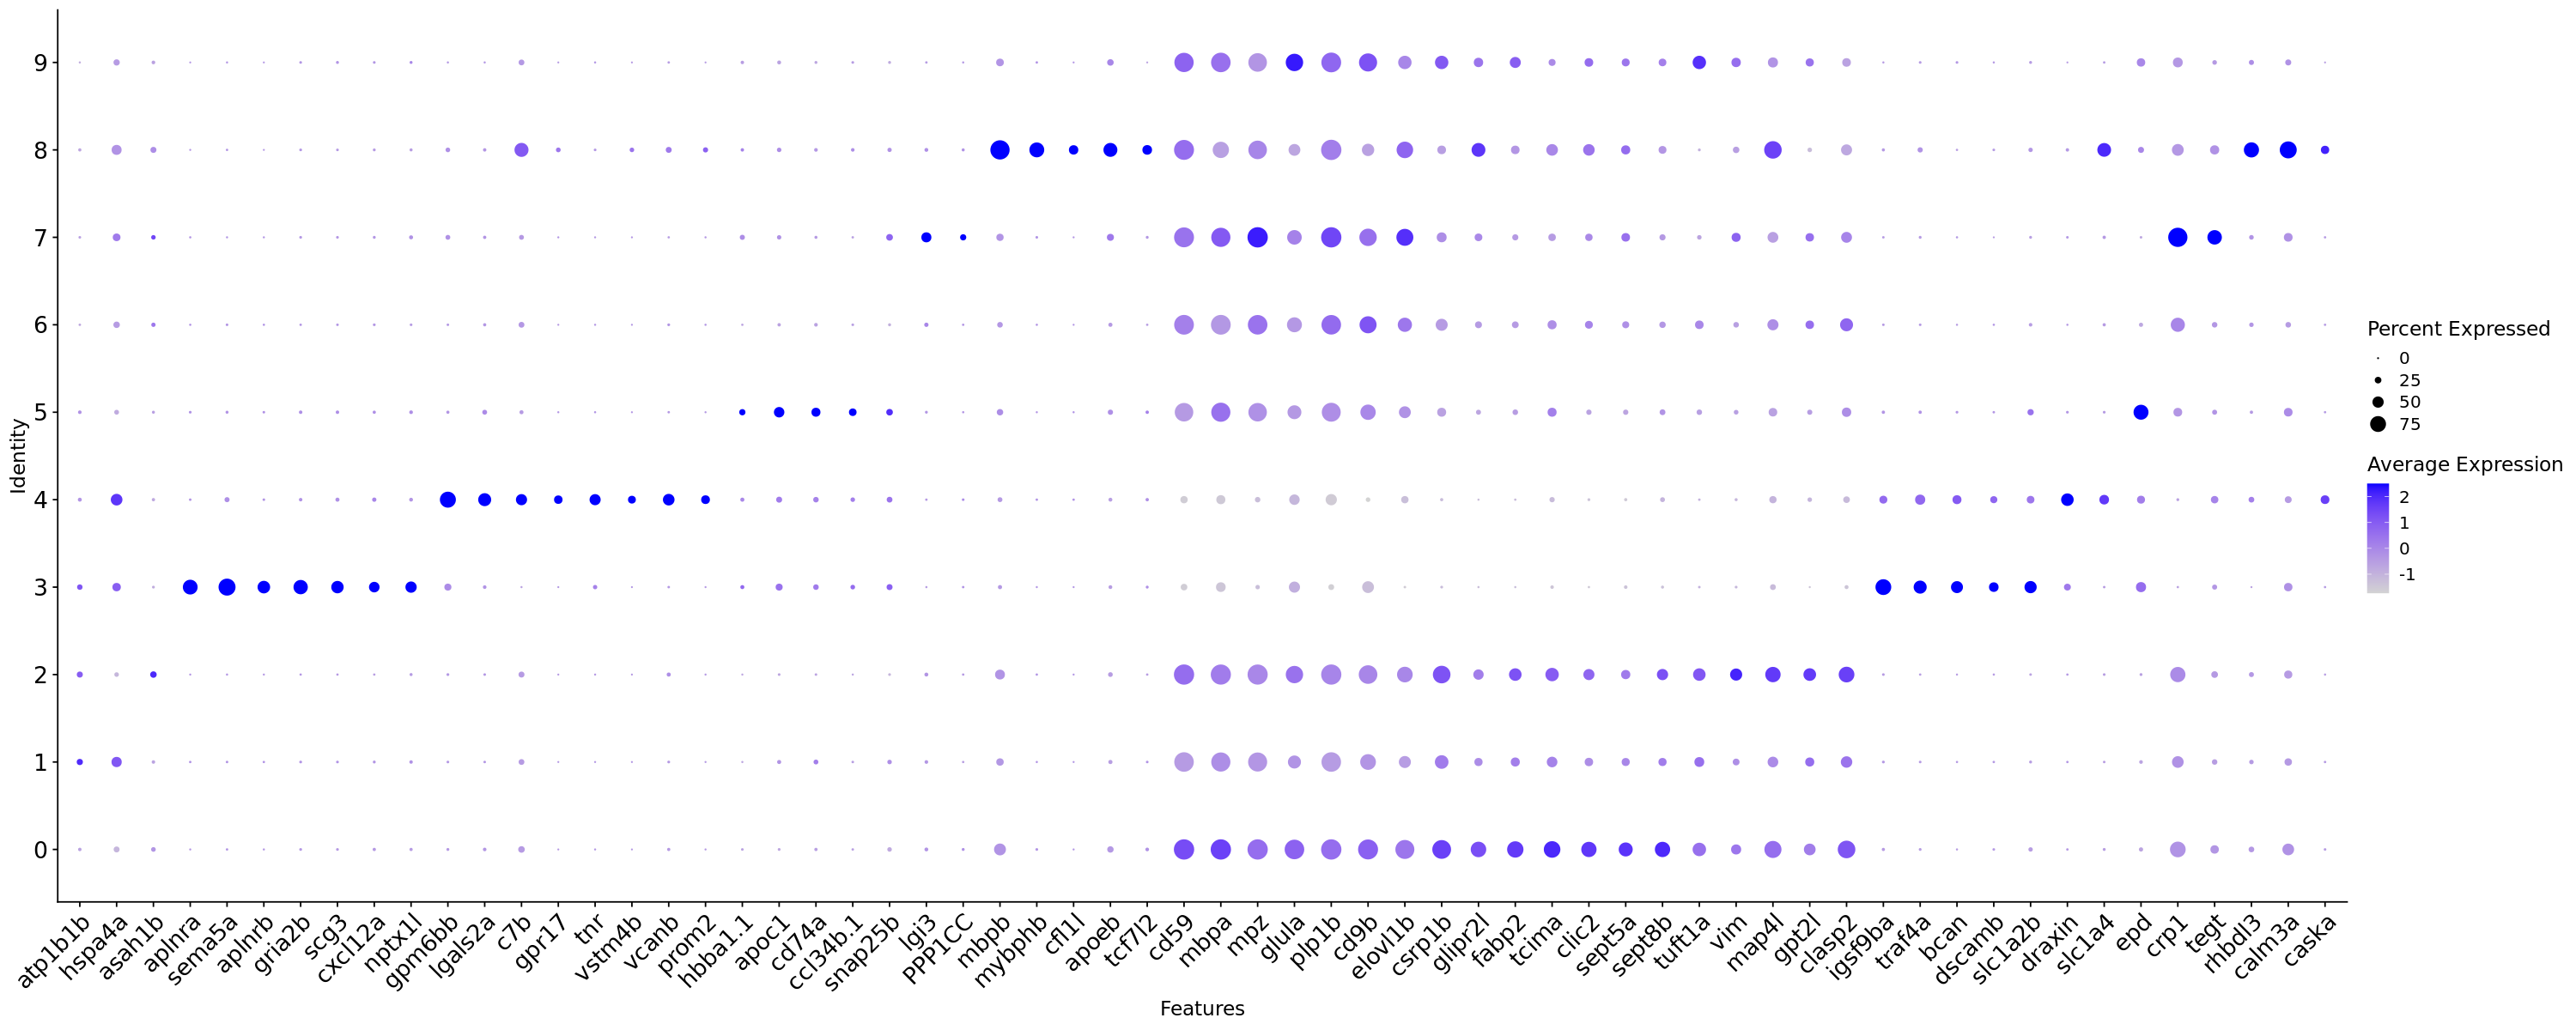

In [48]:
options(repr.plot.width=25, repr.plot.height=10)

dotplot_all <- DotPlot(ogd_pool, features = all_markers_vector) + theme(axis.text.x = element_text(angle = 45, size = 16, hjust = 1, vjust = 1), axis.text.y = element_text(size = 16)) + RotatedAxis()
dotplot_all

#### QC: check fraction of orig.ident per cluster

Before I start merging clusters based on similarity, I want to make sure that all the clusters have at least two libraries supporting them (ie no strong batch effect). Those that exhibit batch effect are good candidates for merging with similar cluster or exclusion from the dataset.    
As a minimal heuristic for now I look into whether any cluster is made >90% of a single library.  

In [58]:
orig.ident.by.cluster <- table(ogd_pool$orig.ident, ogd_pool$pc20_res0.6_clusters_numeric)

In [59]:
orig.ident.by.cluster[1:5, 1:5]

          
             0   1   2   3   4
  b1_tel     1   4   1  26  21
  b10_cer    3   5   7   3   3
  b10_dien   6 485 443  89  20
  b10_ot    12 703 508  71  40
  b10_tel    2   1   0   1   0

In [60]:
#margin = 1 sums across rows (how is brain reg distributed over clusters)
orig.ident.by.cluster.norm <- round(prop.table(orig.ident.by.cluster, margin = 1), digits = 10)
#orig.ident.by.cluster.norm <- orig.ident.by.cluster.perc1 * 100

In [61]:
orig.ident.by.cluster.norm[1:5, 1:5]

          
                     0           1           2           3           4
  b1_tel   0.015873016 0.063492064 0.015873016 0.412698413 0.333333333
  b10_cer  0.142857143 0.238095238 0.333333333 0.142857143 0.142857143
  b10_dien 0.005644403 0.456255880 0.416745061 0.083725306 0.018814675
  b10_ot   0.008817046 0.516531962 0.373254960 0.052167524 0.029390154
  b10_tel  0.500000000 0.250000000 0.000000000 0.250000000 0.000000000

In [62]:
#margin = 2 sums across columns (which brain regs make up each cluster) - this is what I need for per cluster calculation
#use as input rowwise normalized data
orig.ident.by.cluster.df <- as.data.frame(round(prop.table(orig.ident.by.cluster.norm, margin = 2), digits = 10))
colnames(orig.ident.by.cluster.df) <- c("Brain.reg", "Cluster", "Fraction")

In [63]:
head(orig.ident.by.cluster.df)

Brain.reg Cluster Fraction   
1 b1_tel    0       0.003194263
2 b10_cer   0       0.028748363
3 b10_dien  0       0.001135871
4 b10_ot    0       0.001774330
5 b10_tel   0       0.100619271
6 b11_mult  0       0.137479796

In [64]:
max(orig.ident.by.cluster.df$Fraction)

[1] 0.3976175

In [65]:
orig.ident.by.cluster.df[which(orig.ident.by.cluster.df$Fraction > 0.3),]

Brain.reg Cluster Fraction 
197 b13_mult  7       0.3677229
199 b15_mult  7       0.3976175

Based on the previously used 90% cutoff, all clusters would pass qc. With a lower cutoff it's evident that cluster 7 has some batch effect that seems to be driven mainly bit kit chemistry (b13 and b15 are from 5' kit unlike the majority of the dataset which is from 3'). I had already noted that based on marker expression, this cluster shares a lot of genes with the large 0/1/2/6 group - will merge with those clusters in the final annotation.  

### Quantify regional specificity per cluster

Do this iteratively while checking markers and possible merges/exclusions in the section above. Final version will be made when I decide on the final clustering.

In [14]:
# pallette for brain regions based on https://colorbrewer2.org/#type=qualitative&scheme=Accent&n=5
reg_colors <- c("tel" = "#7fc97f", #green
                "dien" = "#beaed4", #purple
                "mes" = "#fdc086", #orange
                "rhom" = "#ffff99", #yellow
                "whole" = "#386cb0" #blue
                )

In [67]:
brain.reg.by.cluster <- table(ogd_pool$brain_reg, ogd_pool$pc20_res0.6_clusters_numeric)

In [68]:
brain.reg.by.cluster

       
           0    1    2    3    4    5    6    7    8    9
  dien   441  549  476  314  115  188   54    0   37    0
  mes    441  810  575  211  127  143   44    0   34    0
  rhom   433   57   65  129   90  122   34    0   22    0
  tel     24   37   11  203   93   25   13    0    3   78
  whole 1177  618  556  691  616  428  397  353  115    0

In [69]:
#margin = 1 sums across rows (how is brain reg distributed over clusters)
brain.reg.by.cluster.norm <- round(prop.table(brain.reg.by.cluster, margin = 1), digits = 10)
#brain.reg.by.cluster.norm <- brain.reg.by.cluster.perc1 * 100

In [70]:
brain.reg.by.cluster.norm

       
                  0           1           2           3           4           5
  dien  0.202851886 0.252529899 0.218951242 0.144434223 0.052897884 0.086476541
  mes   0.184905660 0.339622641 0.241090147 0.088469602 0.053249476 0.059958071
  rhom  0.454831933 0.059873950 0.068277311 0.135504202 0.094537815 0.128151261
  tel   0.049281314 0.075975359 0.022587269 0.416837782 0.190965092 0.051334702
  whole 0.237729752 0.124823268 0.112300545 0.139567764 0.124419309 0.086447182
       
                  6           7           8           9
  dien  0.024839006 0.000000000 0.017019319 0.000000000
  mes   0.018448637 0.000000000 0.014255765 0.000000000
  rhom  0.035714286 0.000000000 0.023109244 0.000000000
  tel   0.026694045 0.000000000 0.006160164 0.160164271
  whole 0.080185821 0.071298728 0.023227631 0.000000000

In [71]:
#margin = 2 sums across columns (which brain regs make up each cluster) - this is what I need for per cluster calculation
#use as input rowwise normalized data
brain.reg.by.cluster.df <- as.data.frame(round(prop.table(brain.reg.by.cluster.norm, margin = 2), digits = 10))
colnames(brain.reg.by.cluster.df) <- c("Brain.reg", "Cluster", "Fraction")

In [72]:
head(brain.reg.by.cluster.df)

Brain.reg Cluster Fraction 
1 dien      0       0.1795784
2 mes       0       0.1636912
3 rhom      0       0.4026485
4 tel       0       0.0436272
5 whole     0       0.2104547
6 dien      1       0.2961098

In [73]:
max(brain.reg.by.cluster.df$Fraction)

[1] 1

In [74]:
p_br <- ggplot(data = brain.reg.by.cluster.df, aes(x = Cluster, y = Fraction, fill = Brain.reg)) + geom_bar(stat="identity") + 
coord_cartesian(ylim = c(0,1)) + labs(x="Cluster", y="Fraction") +  
theme(axis.title = element_text(size = 18), axis.text = element_text(size = 16),   plot.title = element_text(size = 16, hjust = 0.5))  + 
coord_flip() + scale_fill_manual(values = reg_colors)

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



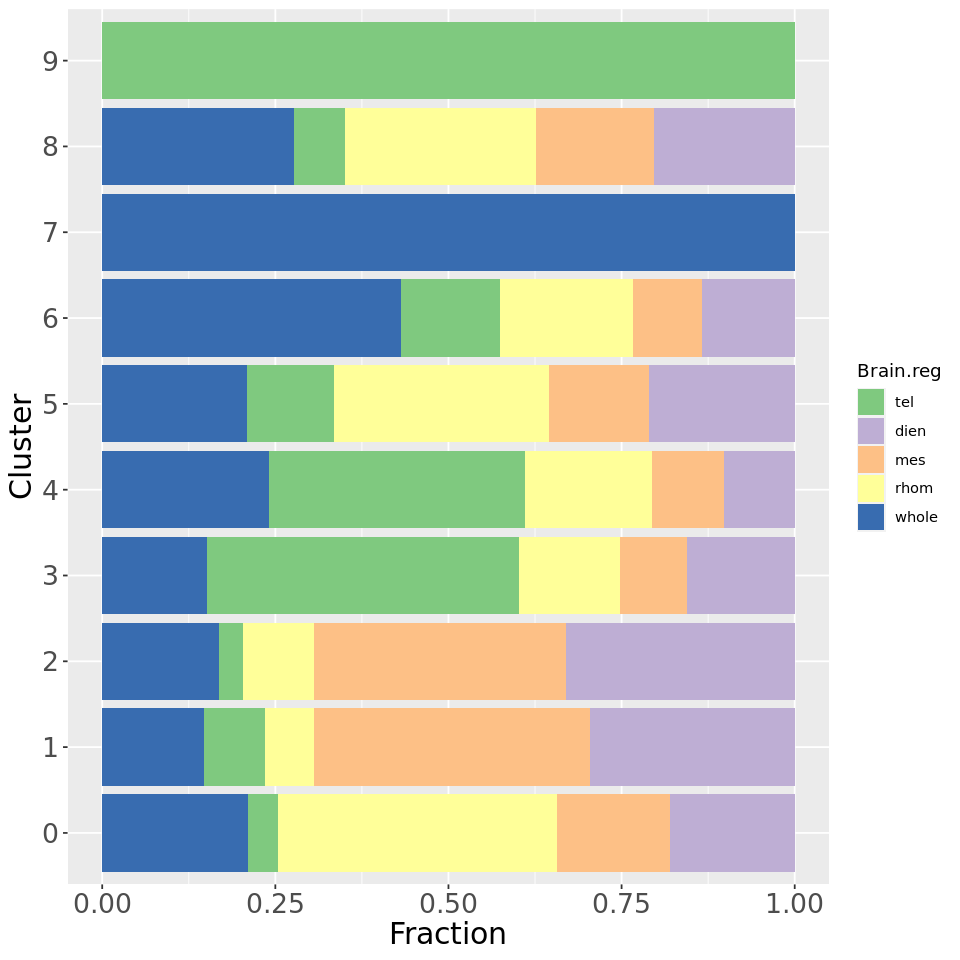

In [75]:
options(repr.plot.width=8, repr.plot.height=8)

p_br


Most clusters are a mix of regions, some are very specific but those are the clusters that are already flagged for merging.  

### Annotate clusters

#### Step 1: reorder numeric cluster names

In [77]:
# save original numeric names
#ogd_pool$pc20_res0.6_clusters_numeric<- Idents(ogd_pool)

In [204]:
# if needed to restore original numeric cluster names
Idents(ogd_pool) <- ogd_pool$pc20_res0.6_clusters_numeric

In [76]:
table(ogd_pool$pc20_res0.6_clusters_numeric)


   0    1    2    3    4    5    6    7    8    9 
2516 2071 1683 1548 1041  906  542  353  211   78 

In [78]:
# add numeric names that reflect final clustering with manual corrections
# add +1 to cluster names so they start with 1 (I prefer this for the manuscript figure)
# manually merge clusters that co-localize on UMAP and show no sufficient marker distinction
# former clusters 1, 2, 5, 6, 7 and 9 are merged with 0 and all renamed as "1"

ogd_pool <- RenameIdents(object = ogd_pool, 
                        "0" = "1",
                         "1" = "1", #merge with former 0
                         "2" = "1", #merge with former 0
                         "3" = "2",
                         "4" = "3",
                         "5" = "1", #merge with former 0
                         "6" = "1", #merge with former 0
                         "7" = "1", #merge with former 0
                         "8" = "4", 
                         "9" = "1" #merge with former 0
                        )

#stash
ogd_pool[["pc20_res0.6_clusters_numeric_edited"]] <- Idents(object = ogd_pool)

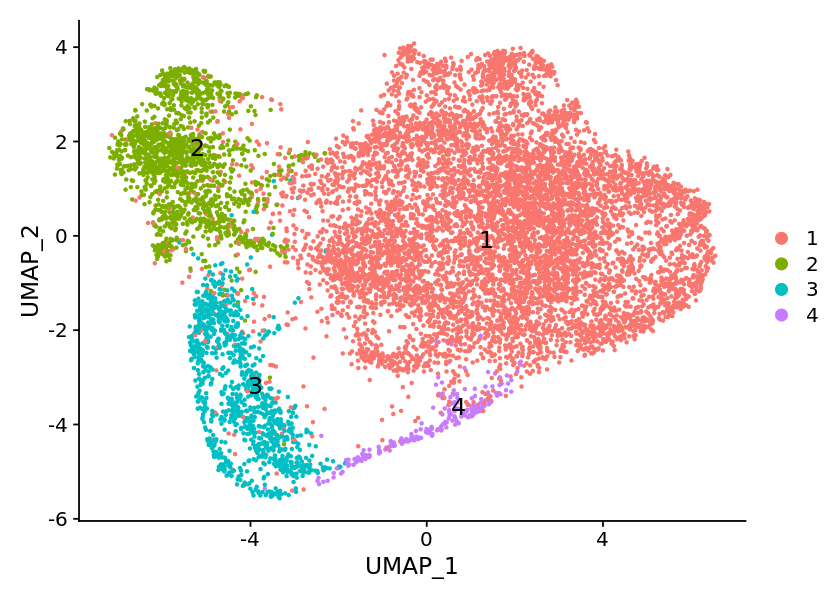

In [79]:
options(repr.plot.width=7, repr.plot.height=5)

DimPlot(object = ogd_pool, reduction = 'umap', label = TRUE, label.size = 5, pt.size = 0.6, repel = TRUE)

#### Step 2: recalculate fraction brain region + replot markers

In [80]:
brain.reg.by.cluster <- table(ogd_pool$brain_reg, ogd_pool$pc20_res0.6_clusters_numeric_edited)

In [81]:
brain.reg.by.cluster.diss <- brain.reg.by.cluster[c(1:4),]
brain.reg.by.cluster.diss

      
          1    2    3    4
  dien 1708  314  115   37
  mes  2013  211  127   34
  rhom  711  129   90   22
  tel   188  203   93    3

In [82]:
#margin = 1 sums across rows (how is brain reg distributed over clusters)
brain.reg.by.cluster.diss.norm <- round(prop.table(brain.reg.by.cluster.diss, margin = 1), digits = 10)
#brain.reg.by.cluster.norm <- brain.reg.by.cluster.perc1 * 100

In [83]:
brain.reg.by.cluster.diss.norm

      
                 1           2           3           4
  dien 0.785648574 0.144434223 0.052897884 0.017019319
  mes  0.844025157 0.088469602 0.053249476 0.014255765
  rhom 0.746848739 0.135504202 0.094537815 0.023109244
  tel  0.386036961 0.416837782 0.190965092 0.006160164

In [84]:
#margin = 2 sums across columns (which brain regs make up each cluster) - this is what I need for per cluster calculation
#use as input rowwise normalized data
brain.reg.by.cluster.diss.df <- as.data.frame(round(prop.table(brain.reg.by.cluster.diss.norm, margin = 2), digits = 10))
colnames(brain.reg.by.cluster.diss.df) <- c("Brain.reg", "Cluster", "Fraction")

In [85]:
head(brain.reg.by.cluster.diss.df)

Brain.reg Cluster Fraction 
1 dien      1       0.2843916
2 mes       1       0.3055229
3 rhom      1       0.2703467
4 tel       1       0.1397389
5 dien      2       0.1839350
6 mes       2       0.1126649

In [86]:
p_br_diss <- ggplot(data = brain.reg.by.cluster.diss.df, aes(x = Cluster, y = Fraction, fill = Brain.reg)) + geom_bar(stat="identity") + 
coord_cartesian(ylim = c(0,1)) + labs(x="Cluster", y="Fraction") +  
theme(axis.title = element_text(size = 18), axis.text = element_text(size = 16),   plot.title = element_text(size = 16, hjust = 0.5))  + 
coord_flip() + scale_fill_manual(values = reg_colors)

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



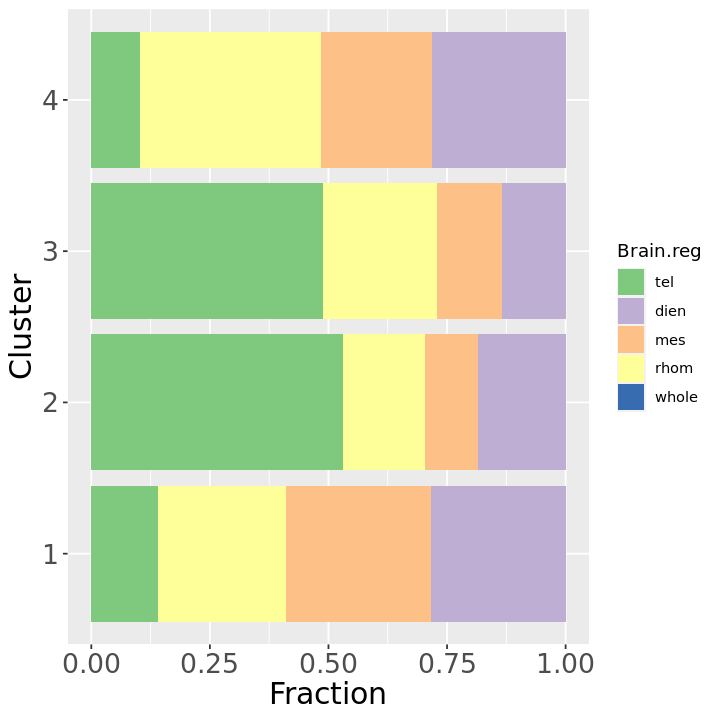

In [88]:
options(repr.plot.width=6, repr.plot.height=6)

p_br_diss

This shows a bit more enrichment in telencephalon than I had previously? Think about how to structure in the narrative.  
However, it's clear that no subtype has a purely regional presence.  

Replot markers (dataset-specific).

In [ ]:
# add markers to dotplot that were found in the cluster by cluster exploration!

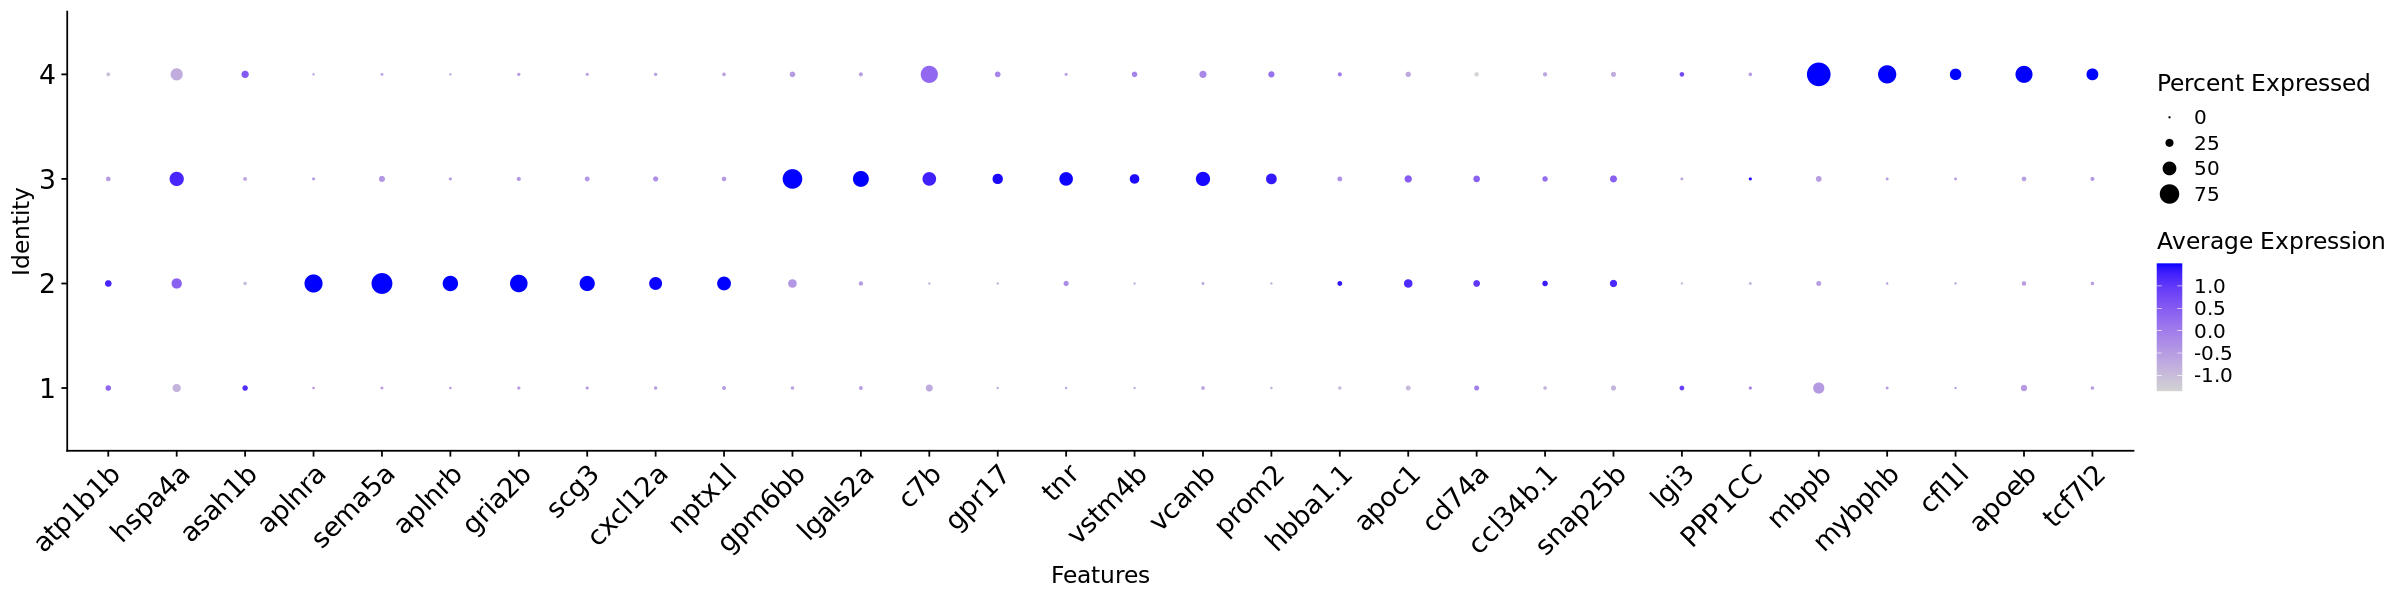

In [89]:
options(repr.plot.width=20, repr.plot.height=5)

dotplot_unique <- DotPlot(ogd_pool, features = unique_markers_vector) + theme(axis.text.x = element_text(angle = 45, size = 16, hjust = 1, vjust = 1), axis.text.y = element_text(size = 16)) + RotatedAxis()
dotplot_unique 

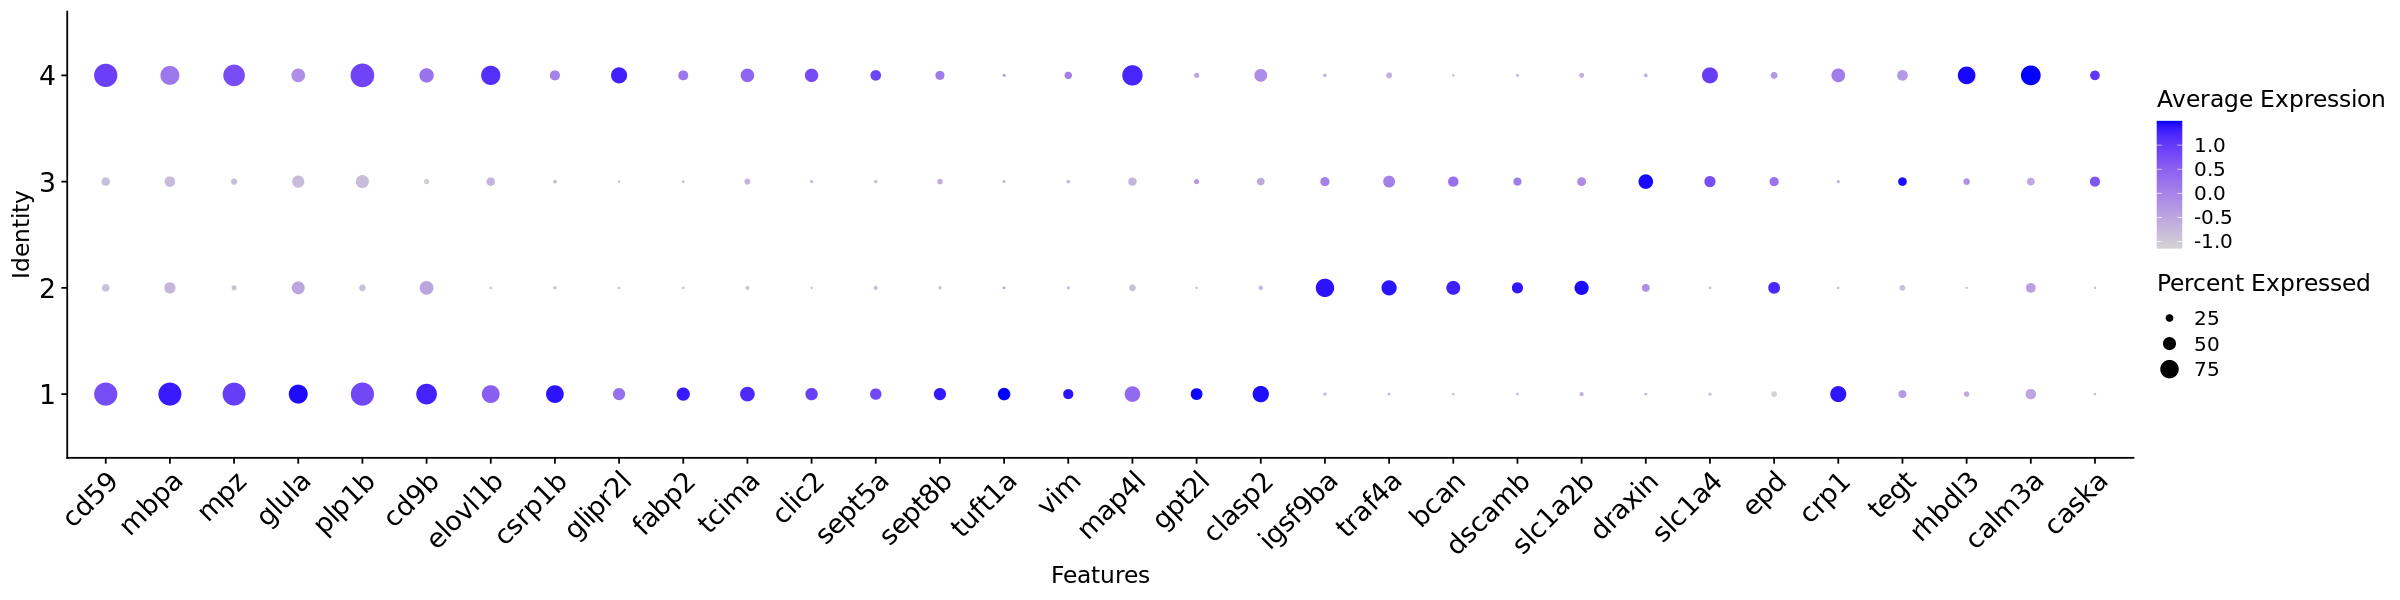

In [90]:
options(repr.plot.width=20, repr.plot.height=5)

dotplot_shared <- DotPlot(ogd_pool, features = shared_markers_vector) + theme(axis.text.x = element_text(angle = 45, size = 16, hjust = 1, vjust = 1), axis.text.y = element_text(size = 16)) + RotatedAxis()
dotplot_shared 

#### Step 3: assign biologically meaningful cluster names
Based on region and marker.

In [96]:
# restore "corrected" numeric cluster names
Idents(ogd_pool) <- ogd_pool$pc20_res0.6_clusters_numeric_edited

In [97]:
table(ogd_pool@active.ident)


   1    2    3    4 
8149 1548 1041  211 

In [98]:
ogd_pool <- RenameIdents(object = ogd_pool, 
                         "1" = "Oligodendrocytes (mpz)",  
                         "2" = "Oligodendrocyte precursor cells",  
                         "3" = "Oligodendrocytes (draxin)",  
                         "4" = "Oligodendrocytes (mbpb)" #note: still have some questions about the validity of this cluster
                        )

#stash
ogd_pool[["pc20_res0.6_named_detailed"]] <- Idents(object = ogd_pool)

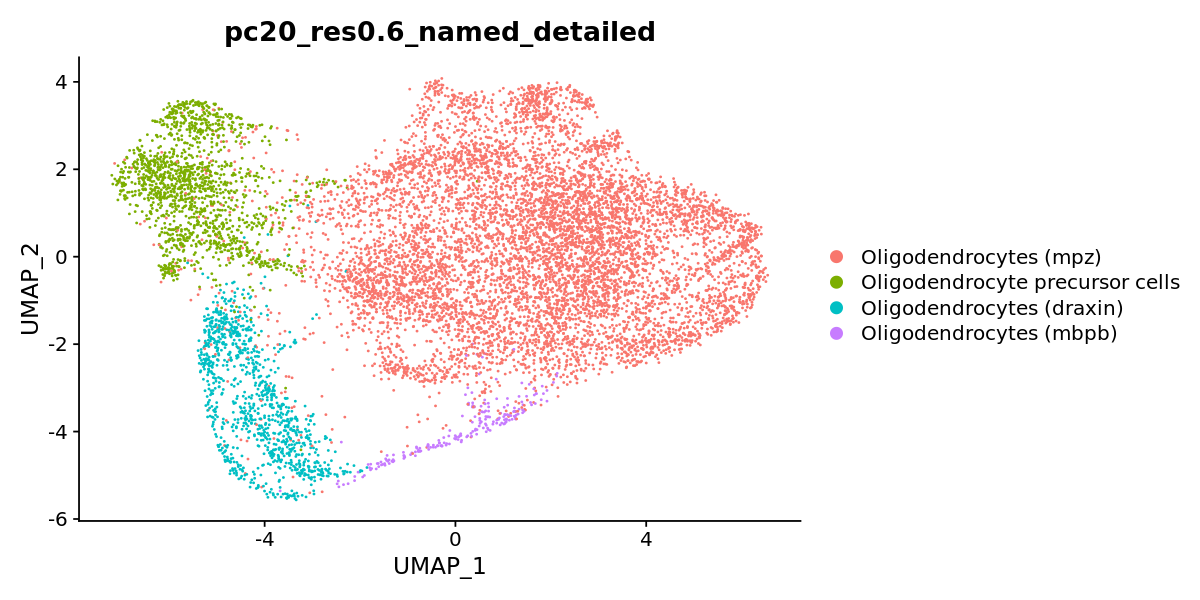

In [107]:
options(repr.plot.width=10, repr.plot.height=5)

DimPlot(ogd_pool, group.by = "pc20_res0.6_named_detailed")

For easier plotting also add a shorter version of the same names.

In [101]:
# restore "corrected" numeric cluster names
Idents(ogd_pool) <- ogd_pool$pc20_res0.6_clusters_numeric_edited

In [102]:
table(ogd_pool@active.ident)


   1    2    3    4 
8149 1548 1041  211 

In [103]:
ogd_pool <- RenameIdents(object = ogd_pool, 
                         "1" = "OGD (mpz)",  
                         "2" = "OPC",  
                         "3" = "OGD (draxin)",  
                         "4" = "OGD (mbpb)" #note: still have some questions about the validity of this cluster
                        )

#stash
ogd_pool[["pc20_res0.6_named_detailed_short"]] <- Idents(object = ogd_pool)

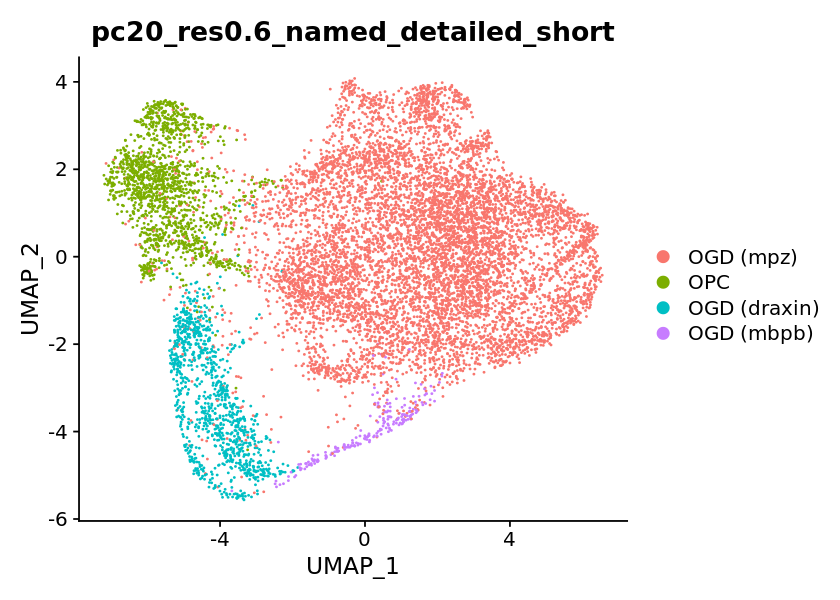

In [106]:
options(repr.plot.width=7, repr.plot.height=5)

DimPlot(ogd_pool, group.by = "pc20_res0.6_named_detailed_short")

Finally, for the plots in the manuscript include number in front of the name to keep Fig 2 and Fig 1 linked.  

In [3]:
# restore "corrected" numeric cluster names
Idents(ogd_pool) <- ogd_pool$pc20_res0.6_clusters_numeric_edited

In [4]:
table(ogd_pool@active.ident)


   1    2    3    4 
8149 1548 1041  211 

In [5]:
ogd_pool <- RenameIdents(object = ogd_pool, 
                         "1" = "1. OGD (mpz)",  
                         "2" = "2. OPC",  
                         "3" = "3. OGD (draxin)",  
                         "4" = "4. OGD (mbpb)" #note: still have some questions about the validity of this cluster
                        )

#stash
ogd_pool[["pc20_res0.6_named_detailed_short_num"]] <- Idents(object = ogd_pool)

### Re-save/load object

In [20]:
# save this embedding with updated clustering and metadata labels
saveRDS(ogd_pool, file = "/local/Nina/jupyterlab/brains_trans/ogd_pool_reg.rds")

In [2]:
# read in
ogd_pool <- readRDS(file = "/local/Nina/jupyterlab/brains_trans/ogd_pool_reg.rds")